In [18]:
# Imports
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import sklearn as sk
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

from matplotlib import pyplot

In [19]:
df_am = pd.read_csv('../cleanedAuthorMethodV3.csv')

# df_am.head()

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
df_am.head()

df_am['methodHash'].value_counts()

In [ ]:
# small_df = df.sample(5000)

# small_df

In [ ]:
# lonewolfs = pd.read_csv('lonewolfsV3.csv')
# lonewolfs = lonewolfs.rename(columns={"author": "authorID"})

# lonewolfs
# lonewolfs['authorId']

In [ ]:
# small_df.loc[small_df['authorID'].isin(lonewolfs['authorID']]
                                       
df_am = df_am.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'])

In [ ]:
df_am

# df_am.loc[df_am['authorID'].isin(lonewolfs['authorID'])]

In [ ]:
v = df_am.projectID.value_counts()
df_am[df_am.projectID.isin(v.index[v.gt(1)])]

# drop duplicate rows based on authorID & projetId
projects = df_am.drop_duplicates(subset=['authorID', 'projectID'])

projects = projects[projects.groupby('projectID')['projectID'].transform('size') > 1]

f=open('projects_over2.txt','w')
s1='\n'.join(projects)
f.write(s1)
f.close()

print(projects['projectID'].value_counts())

In [ ]:
df_author_project_methods = df_am.groupby(['authorID', 'projectID'])['methodHash'].nunique()

In [ ]:
df_author_project_methods

In [ ]:
df_author_project_methods.max()

In [ ]:
# df_apm = pd.DataFrame(df_author_project_methods)

df_apm = pd.Series.to_frame(df_author_project_methods).reset_index()

df_apm.head(5)

In [ ]:
df_apm = df_apm[df_apm.methodHash > 2]

In [ ]:
df_apm.head(7)

In [ ]:
# df_apm['methodsWritten'].where(df_apm['methodsWritten'] == 41969).dropna()

In [ ]:
# df_apm['methodsWritten'].idxmax()

In [20]:
# df_apm.loc[df_apm['methodsWritten'].idxmax()]

In [21]:
df_number_methods_project = df_am.groupby('projectID')['methodHash'].nunique()

In [22]:
df_nmp = pd.Series.to_frame(df_number_methods_project).reset_index()

df_nmp

,projectID,methodHash
0,106189,8
1,158668,6
2,343989,206
3,433574,22
4,494691,39
...,...,...
28263,4230664909,34
28264,4233549479,3
28265,4237857043,110
28266,4256731722,9


In [23]:
df_nmp = df_nmp[df_nmp.methodHash > 50]

df_nmp.shape

(9350, 2)

In [24]:
df_nmp.mean()

projectID     1.472110e+09
methodHash    7.251397e+02
dtype: float64

In [25]:
df_nmp = df_nmp.rename(columns={"methodHash": "methodsTotal"})

df_apm = df_apm.rename(columns={"methodHash": "methodsWritten"})

In [26]:
df_nmp.shape
df_nmp.head(1)


df_apm.shape
df_apm.head(1)

(9350, 2)

,projectID,methodsTotal
2,343989,206


(67096, 3)

,authorID,projectID,methodsWritten
0,0000af9f-a905-451b-97eb-11659ec418ae,202844298,34


In [27]:
# df_apm.loc[df_apm['projectID'].isin(df_nmp['projectID'])]

df_test = pd.merge(df_apm, df_nmp, on=['projectID'], how='left') 

df_test.head(3)

df_test.shape

,authorID,projectID,methodsWritten,methodsTotal
0,0000af9f-a905-451b-97eb-11659ec418ae,202844298,34,NaN
1,000d68e3-5cfd-ac90-4cfb-6ca73a5f0a2b,2174734165,3,NaN
2,000dff81-1f83-c6b8-7b91-c9427d763ce2,441741744,370,387.0


(67096, 4)

In [28]:
# # import multiprocessing

# def get_lonewolves():
#     lone_wolves = []
#     for index, row in df_apm.iterrows():
#         for index, row2 in df_nmp.iterrows():
#             if row['projectID'] == row2['projectID']:
#                 if row2['methodHash'] > 3:
#                     if (row['methodHash'] / row2['methodHash']) > 0.5:
#     #                     print(row['authorID'], row['methodHash'], "/", row2['methodHash'], "=", row['methodHash'] / row2['methodHash'])
#                         lone_wolves.append(row['authorID'])
#     return lone_wolves

# #%%
# import multiprocessing
# # from workers import get_lonewolves

# #%%
# if __name__ ==  '__main__': 
#     pool = multiprocessing.Pool()
#     results = pool.map(get_lonewolves, [1,2,3,4,5,6])
#     pool.close()
#     pool.join()
#     print(results)

In [29]:
lone_wolves = []

In [30]:
for index, row in df_test.iterrows():
            if row['authorID'] not in lone_wolves:     
                if (row['methodsWritten'] / row['methodsTotal']) > 0.66:
                    print(index, row['authorID'], row['methodsWritten'], "/", row['methodsTotal'], "=", row['methodsWritten'] / row['methodsTotal'])
                    lone_wolves.append(row['authorID'])

2 000dff81-1f83-c6b8-7b91-c9427d763ce2 370 / 387.0 = 0.9560723514211886
11 001b3152-ac8a-d673-f1a3-390018a926a9 243 / 248.0 = 0.9798387096774194
32 002e3995-e4a0-6de4-83a0-8ee00da482f9 114 / 114.0 = 1.0
34 002e6c09-0389-69f9-1016-513c2f3466a6 52 / 52.0 = 1.0
55 00347348-4f54-ea03-f1ea-c127a33cd48d 90 / 90.0 = 1.0
63 003df9aa-452f-b203-1883-82c5e2d25625 1353 / 1354.0 = 0.9992614475627769
88 0042a305-a724-831b-fdbd-669df6eef763 51 / 51.0 = 1.0
107 00556426-8e64-9116-b995-b742ac7e41f8 150 / 150.0 = 1.0
120 005efbf4-ede0-a7dd-06a8-fa001ba26721 2846 / 4062.0 = 0.7006400787789266
193 00aaac31-5243-bcfb-8840-93004c8d2725 86 / 86.0 = 1.0
201 00b26ffb-4dd1-ed00-10ab-51d5802b4776 75 / 75.0 = 1.0
250 00d46858-711c-035b-c815-0b8865c7df1d 891 / 1308.0 = 0.6811926605504587
254 00da018e-b502-bcae-d2a2-bcad30e30f03 573 / 592.0 = 0.9679054054054054
259 00e15893-2eb9-3016-3199-beafe1935f07 62 / 62.0 = 1.0
262 00e85170-c0d3-f5da-e454-bb8d9f53f5d4 53 / 53.0 = 1.0
299 00fa4806-85b6-bc06-f4df-d43f8d755ec6 5

1600 065022ed-f778-a9e6-8ce0-b16b7f3a3de2 71 / 71.0 = 1.0
1607 0662d671-ffa6-e22c-47f3-83614ae4d9d8 186 / 189.0 = 0.9841269841269841
1610 0664ff2f-39ab-2c7e-578b-8cfb7ba57108 55 / 55.0 = 1.0
1613 066dc285-7f63-7b50-1329-4e98eb152291 280 / 280.0 = 1.0
1624 0682ea19-20a3-1b68-9e8d-ba51c31064bb 467 / 484.0 = 0.9648760330578512
1637 069520a7-91cc-7f06-31b0-a749120392f6 142 / 142.0 = 1.0
1664 06aa32e3-3dd4-94ae-b73f-e8f95d44e5cd 118 / 118.0 = 1.0
1666 06adcfdb-e0ae-2ee6-aa76-33325f260080 196 / 196.0 = 1.0
1707 06d57e43-fc04-bfb1-546a-6c9379213de8 56 / 77.0 = 0.7272727272727273
1708 06d62471-a7cd-a8ad-828f-216ccf1228cb 286 / 376.0 = 0.7606382978723404
1710 06d76ba2-f3c5-f1b5-584e-c784e74af812 358 / 359.0 = 0.9972144846796658
1715 06db95e0-285f-2f27-b28f-5183554b8f48 70 / 70.0 = 1.0
1716 06e0ef2a-b959-b7b3-8ff7-4eeec2fb34ce 41 / 61.0 = 0.6721311475409836
1729 06f9c5f5-1d10-4fbc-f6cf-b5e9c82f6dac 124 / 171.0 = 0.7251461988304093
1764 06fcaf50-3b39-5926-ec8d-b4e28937a8ce 373 / 552.0 = 0.6757246

3300 0c65f85d-5db8-e7a7-5a43-751b25d1c575 354 / 354.0 = 1.0
3304 0c69cabf-234d-d12c-78c6-89d759e39fd3 95 / 95.0 = 1.0
3314 0c728c6e-4f41-fa8c-69ac-c4502087e01d 85 / 99.0 = 0.8585858585858586
3326 0c75ccb5-9613-ccb2-f2f0-4b982a5e1335 94 / 95.0 = 0.9894736842105263
3333 0c7802ca-af90-ee4a-b3ef-a33121fc3b88 1518 / 1685.0 = 0.9008902077151335
3364 0ca5ad55-adf0-1936-13ee-cb000eace1e6 196 / 196.0 = 1.0
3373 0cb82550-fb9d-c435-102f-1b4efd8f0bb5 2092 / 2582.0 = 0.8102246320681642
3383 0cbce97d-9fcb-829f-68b1-1243d08437e5 138 / 159.0 = 0.8679245283018868
3386 0cc2c7ee-8ae8-362c-d44c-883c8dc59eec 196 / 196.0 = 1.0
3389 0cc71b47-fbc9-8eb0-4cf6-2e28cbef5a04 48 / 61.0 = 0.7868852459016393
3407 0cd6a5f9-5c7a-a33d-059c-5d29c6c476ae 89 / 89.0 = 1.0
3409 0cd744bc-92fc-9433-b97e-7a9317ce5ac7 62 / 82.0 = 0.7560975609756098
3428 0cf060da-10c4-dc41-b1cf-794d73a09009 176 / 176.0 = 1.0
3472 0d03bb37-ca91-56c6-ab6f-16d04f7cc20e 141 / 141.0 = 1.0
3494 0d1e07af-2f87-3033-703c-0314a22f03a6 1811 / 1953.0 = 0.927

4991 12ef675f-398f-f3a4-211a-4f34cd18f0f8 334 / 334.0 = 1.0
5005 12ffb5a5-1982-6d2f-548c-32e70396b009 434 / 434.0 = 1.0
5028 13166ef5-6e65-f0ba-8c3c-8c968ab6d3e0 341 / 341.0 = 1.0
5030 13197888-a08b-0638-efd8-109680ca152f 70 / 80.0 = 0.875
5035 131d3152-0b4d-b095-1e7c-e7f9034f8090 222 / 268.0 = 0.8283582089552238
5056 132fe07d-9687-fba8-394c-5f101ba6d215 200 / 200.0 = 1.0
5057 1334b712-60b5-d7fc-ea4f-aba102c25db6 1036 / 1036.0 = 1.0
5064 1340077d-7fa8-9e3d-dab0-a6ff794eb6f8 196 / 196.0 = 1.0
5079 135c9599-cd10-7c76-f2af-8e8412e58dad 196 / 196.0 = 1.0
5084 135e5d2b-fd33-e696-5af1-32a7adad69d2 170 / 170.0 = 1.0
5085 135f3e67-f2eb-03ac-3471-3e7964874a8e 225 / 233.0 = 0.9656652360515021
5086 1360549b-13e4-444e-b412-b2ebd3b8304e 61 / 68.0 = 0.8970588235294118
5095 136aac8e-b55c-3532-e77a-fd2ae601c5b7 92 / 92.0 = 1.0
5107 1371fa3b-c910-0a07-77ce-02f58698d7a8 1757 / 2569.0 = 0.6839237057220708
5113 137481a1-f601-81e2-80d3-845113114d66 57 / 57.0 = 1.0
5119 137a7af1-d47b-ad17-c9f7-c282c2ba1135 

6644 195ad411-5a44-cb8e-d25f-c195f93f532a 226 / 226.0 = 1.0
6672 1969e036-984e-6f05-6870-0aca7e8fdfd4 75 / 75.0 = 1.0
6690 19751445-2fed-c212-8354-6305a8b0bcc0 51 / 52.0 = 0.9807692307692307
6715 1989bd58-1a06-0345-57f0-65d99d2b8597 62 / 62.0 = 1.0
6717 198ad5d4-2305-daec-3f12-aa091e30ef32 119 / 124.0 = 0.9596774193548387
6718 198ae155-b2ed-46ae-e743-d7deeb1af29f 137 / 137.0 = 1.0
6735 19a2c229-07c0-8a03-c8ac-01a8a5805a77 75 / 75.0 = 1.0
6778 19b30a15-588d-9ae9-fef9-9ca62732bba2 100 / 107.0 = 0.9345794392523364
6807 19bd2a5b-639f-10b1-ab82-33fe29470b46 837 / 837.0 = 1.0
6810 19c1e316-eae3-4e5e-4b55-0634b9ca209e 591 / 591.0 = 1.0
6813 19c32d8b-da3a-0f96-e5dd-f7c52efb2f94 51 / 51.0 = 1.0
6836 19d34eae-4019-d2e2-1a38-3712c30551ef 81 / 81.0 = 1.0
6849 19daca5b-006f-bb01-fc7c-9e747ca7d2c0 54 / 61.0 = 0.8852459016393442
6892 19f7bcad-0097-f35d-bf1c-30e815edb398 288 / 288.0 = 1.0
6904 19fd6d83-fe24-ed2e-cf4c-933a83293354 140 / 148.0 = 0.9459459459459459
6908 19ffe550-ceaa-77c0-7a21-bebb171b3a

8147 1ef0bdf3-0264-5ebe-e9f4-9679976db3ac 58 / 58.0 = 1.0
8153 1ef8ef73-cac5-24dd-f02e-7be8d2c5e58f 127 / 127.0 = 1.0
8156 1efcd6cd-f5a5-29c9-c33f-7fb5814b97fa 220 / 220.0 = 1.0
8173 1f1167d9-7010-035e-4ee3-4493905dcd18 51 / 51.0 = 1.0
8177 1f153f89-0fff-55f9-b1d8-22380799e297 1577 / 1720.0 = 0.916860465116279
8188 1f1c2345-cbfb-d1a4-ab72-ffb9570370fc 74 / 74.0 = 1.0
8193 1f35b67c-0667-08e4-9094-8f5df659f51f 175 / 175.0 = 1.0
8234 1f63021a-9ba7-5e54-e98d-05e31e7f2d26 97 / 97.0 = 1.0
8264 1f930453-afa6-9c4b-f5a7-6751ce0fd4a1 65 / 65.0 = 1.0
8280 1f9ffd74-f313-307b-125a-ec4ff279a7bb 274 / 274.0 = 1.0
8288 1fa52d51-9aaf-b4ef-57b0-d0042a650695 95 / 117.0 = 0.811965811965812
8321 1fbf5d1d-3f22-8069-bb0f-91952475f259 83 / 83.0 = 1.0
8322 1fc0e6f5-e8c5-8c7d-373a-375389c434ff 463 / 691.0 = 0.6700434153400868
8324 1fc58e24-b2bd-323e-a455-0fbe49e08a2f 196 / 196.0 = 1.0
8363 1fdeffbb-3e5c-3924-dcde-d822ca7d1e4d 162 / 162.0 = 1.0
8375 1feda2c5-cb9e-4f3b-caab-ca484c9c6a1a 225 / 225.0 = 1.0
8383 1fe

11087 2a473c9a-6fab-dadf-bf60-f38346e3a0f4 196 / 196.0 = 1.0
11101 2a5cc34a-1fc9-3a2b-aae1-6828b8ac011b 101 / 101.0 = 1.0
11102 2a5d5557-136b-c9a0-e546-d4b60990e423 182 / 182.0 = 1.0
11120 2a641d69-fcb2-78d5-946d-bca0264dcc04 196 / 196.0 = 1.0
11145 2a74ef6f-2f46-36cf-3841-84273d802bbb 281 / 281.0 = 1.0
11161 2a84e7a4-ac23-0d89-55ea-644218bd2eb9 109 / 109.0 = 1.0
11167 2a9823e9-213c-541b-a619-22b850544335 247 / 247.0 = 1.0
11176 2a9d1073-17f6-6319-d445-266e33cc490f 41969 / 41981.0 = 0.9997141564040876
11179 2aa20037-a809-9983-f329-be7a56f694e5 111 / 111.0 = 1.0
11195 2ac20391-9c8a-64af-9b01-873a54eb7c28 145 / 145.0 = 1.0
11208 2ad599bd-f998-5948-f2ba-0bd04299c419 112 / 112.0 = 1.0
11213 2ad6752d-cf98-3d75-f660-99b4d3828f3c 7750 / 7871.0 = 0.9846271121839665
11240 2ae19ecb-6a70-5916-d2b5-d89335c19cab 549 / 549.0 = 1.0
11241 2ae1e4bd-3299-a9d5-d9e4-c0add61ac6a1 58 / 58.0 = 1.0
11242 2ae74ffd-1100-21d2-2df1-4e0c24590ef8 577 / 872.0 = 0.661697247706422
11278 2afeec0e-bf55-8bc7-274e-7103d09

13642 33d77ea3-41ce-bf5a-e4dc-98ac5cce58bb 491 / 491.0 = 1.0
13673 33ecb846-9464-e4c0-32bd-ba46b86aee71 85 / 85.0 = 1.0
13708 340cea24-598e-0c4f-58fb-9a8a3e2da95d 196 / 197.0 = 0.9949238578680203
13734 34268eb5-2c2a-a2a2-073b-ff1f6cbe4f2b 997 / 997.0 = 1.0
13739 342fe3a3-f38a-fa2e-bdce-ac980e92ddb7 813 / 813.0 = 1.0
13752 343a571e-9c0d-de16-d0ed-a202d6117308 250 / 263.0 = 0.9505703422053232
13754 343abbef-d41a-da7b-4aa2-60d9c3c56890 144 / 144.0 = 1.0
13766 3440a7c0-2808-6736-cb82-01fc3e92fd41 203 / 203.0 = 1.0
13791 345c4aef-bca5-d6f3-ce59-41079dd95e74 233 / 233.0 = 1.0
13795 345ece3d-6808-44eb-1df8-40e0acf074a5 177 / 177.0 = 1.0
13835 3476f075-6327-5fae-13ad-b83dc17b2691 196 / 196.0 = 1.0
13840 347f87e6-1d09-8a06-aadd-71288ff1f8ee 85 / 85.0 = 1.0
13849 348eca4f-c893-1a0b-991c-0bd8149b2e39 428 / 428.0 = 1.0
13884 34b2990d-0474-1c86-c163-93cd3a9c15d3 385 / 385.0 = 1.0
13894 34c3bab4-654a-3b0a-15d3-36039b59291d 196 / 196.0 = 1.0
13901 34cacb7e-8440-ac33-e451-fce1ddea21d2 56 / 56.0 = 1.0


16150 3d4b6ef6-a4b9-2989-1628-b6a2d56250f1 108 / 147.0 = 0.7346938775510204
16154 3d4ffe12-33ac-7f0f-0892-fddae18d6512 527 / 527.0 = 1.0
16184 3d71d2dc-d3fe-8a2e-56a8-16b3010436e1 226 / 226.0 = 1.0
16185 3d743933-4778-9d67-ded2-3af862795d5e 196 / 196.0 = 1.0
16198 3d77b501-e354-4592-f1cf-c9aa827e0d44 63 / 89.0 = 0.7078651685393258
16208 3d7e740c-5cbb-8e50-6b23-3c1584719b68 60 / 61.0 = 0.9836065573770492
16209 3d804e32-3d8c-2f96-d51b-40bce4934421 226 / 226.0 = 1.0
16213 3d872a8f-cb28-91d8-f2fa-bb6cf240667c 66 / 93.0 = 0.7096774193548387
16222 3d930927-4cdc-bc64-8427-fd4bc5696d5f 196 / 196.0 = 1.0
16223 3d94d0d2-0c8e-d21e-37f8-0aba08694521 265 / 265.0 = 1.0
16225 3d9955e9-8e32-6ec2-dc6b-f9bd061ec56a 245 / 245.0 = 1.0
16236 3db30495-5423-135d-9f6f-fdfddaded2f3 226 / 226.0 = 1.0
16257 3dc823dc-ec2e-4af5-b34b-4e4c6efb3029 65 / 65.0 = 1.0
16267 3dd347f3-786f-b90d-50cc-1e675e2c004d 165 / 165.0 = 1.0
16302 3de2d2d2-a50d-d027-8fd4-b7845b726e23 199 / 199.0 = 1.0
16307 3defaddf-cd3e-80b0-e6d5-e4d

18565 46635416-d809-2482-1093-77fe5faa72c5 196 / 196.0 = 1.0
18574 4670d176-fb12-49ca-62b6-b514830dae75 1110 / 1249.0 = 0.88871096877502
18604 467a2c6f-bb7d-e0bc-7f05-f9368187704f 155 / 155.0 = 1.0
18614 467b6cc2-f701-7e58-1745-ff69610551a6 196 / 196.0 = 1.0
18624 4685abc1-b56a-620c-4c44-70716d383921 60 / 60.0 = 1.0
18635 469120fc-73ac-dd55-54dc-7b74866e05ec 863 / 863.0 = 1.0
18641 4698d817-61fa-fc15-3177-53cd6c68671e 95 / 95.0 = 1.0
18646 469bf3cd-68d0-37a1-22f1-f4da22439b9a 196 / 196.0 = 1.0
18650 46a1df3d-26b5-0f87-0bf7-1a7052bb2d74 65 / 69.0 = 0.9420289855072463
18663 46b839b4-38df-3ec7-97a9-8be2dc9d087a 373 / 374.0 = 0.9973262032085561
18666 46bb2cd0-8193-d215-a3f0-f98cb2f84006 2169 / 2877.0 = 0.7539103232533889
18690 46c571e9-dd97-b902-d6b7-812fb9ecfd84 371 / 486.0 = 0.7633744855967078
18748 47136826-0ab7-5880-c208-a13896533f61 518 / 614.0 = 0.8436482084690554
18752 471bd42e-5c89-ec9b-4adc-a358103f7589 91 / 91.0 = 1.0
18754 471bfe7b-f281-a6f7-a8e0-7048c0bef934 8599 / 9209.0 = 0.9

20886 4f0d7464-fb1f-642f-220c-233de4a34f80 230 / 230.0 = 1.0
20888 4f0f233f-ad43-8d6d-5d55-464aa4fe5b83 81 / 81.0 = 1.0
20891 4f110cd2-5f09-1f7d-87e7-b16b3d323cc1 90 / 90.0 = 1.0
20898 4f1e210b-d299-6065-b8f4-1b264bb3bf4c 821 / 821.0 = 1.0
20902 4f1fa8b1-c289-7c7a-99f5-3fe66ff13965 9916 / 14987.0 = 0.6616400880763328
20913 4f21ef9a-539e-7192-e0ba-d6a356feb9a0 978 / 978.0 = 1.0
20922 4f28f80a-3c01-24f3-8ea2-599a9c20e892 66 / 66.0 = 1.0
20929 4f31c461-1645-a51f-7384-f900ed3b6a6a 155 / 162.0 = 0.9567901234567902
20933 4f341ee2-9afa-0279-ca3d-e9af4ebe8496 1322 / 1552.0 = 0.8518041237113402
20944 4f4333b1-49ef-8718-7648-5990cb80afa2 595 / 595.0 = 1.0
20953 4f4b1b93-992e-65af-69f5-ddc1036d0057 188 / 188.0 = 1.0
20974 4f5d5a47-6fde-6fe8-2cfc-1f0325997457 527 / 527.0 = 1.0
20995 4f720706-c03d-68d2-e525-10413db7db27 1222 / 1222.0 = 1.0
21001 4f73b554-9364-197a-5ff8-08290a28bb1c 196 / 196.0 = 1.0
21007 4f7b14fb-2185-5574-bb0f-d3638123ba2b 76 / 76.0 = 1.0
21049 4f875f66-afbb-521d-c803-a12c314b0d7

23176 5725b189-4e60-4821-c2b8-7154f486cb7b 219 / 219.0 = 1.0
23178 57262bf5-f413-98a8-d72f-40c043af4cd6 997 / 1192.0 = 0.8364093959731543
23183 57305a9e-a4d7-3509-7f72-06e815168573 163 / 163.0 = 1.0
23187 573b1158-e64d-28ca-10b0-2bb12a0585d5 231 / 231.0 = 1.0
23219 5761e515-0285-33c1-aeab-9c942fb45ccd 185 / 195.0 = 0.9487179487179487
23271 577fe656-8e19-73fd-3fa5-7423274d4bdc 174 / 174.0 = 1.0
23283 5785bf1b-3e07-a03b-4b37-679fe3b8bc45 224 / 224.0 = 1.0
23294 578f6da9-8258-2a66-c6b5-2e60c1bb02ce 612 / 612.0 = 1.0
23313 579693d6-98d8-31e6-ba31-c9f6079a3173 1498 / 1498.0 = 1.0
23316 57995241-3667-7011-96c2-920cbbd942fa 197 / 197.0 = 1.0
23332 57a2123d-3aa9-c134-f009-81bb059f0d67 196 / 196.0 = 1.0
23341 57acbcb9-e708-2750-2fd4-5f9a85bea6ed 219 / 219.0 = 1.0
23342 57ada32f-7f54-7c37-b726-5a30a2193c8a 198 / 198.0 = 1.0
23349 57af26ac-1f2c-2ff9-be1e-6e1cf125049f 578 / 701.0 = 0.8245363766048502
23381 57e338d3-7d8c-ebbe-d666-bca98db794f3 91 / 96.0 = 0.9479166666666666
23394 57f5cb33-e3d0-2d4e

25450 5fb0c3fa-53e5-6100-f1d6-94b8e6252ed6 206 / 206.0 = 1.0
25466 5fbd22de-fc01-2f7e-e2b2-79f00be7789a 220 / 220.0 = 1.0
25482 5fd70384-e1f8-e7af-77ed-129eee484ca2 54 / 54.0 = 1.0
25483 5fd72661-623c-06e5-eac4-7ae418815332 196 / 196.0 = 1.0
25490 5fe345d4-1b45-0359-4fe2-2e8153a5708d 949 / 949.0 = 1.0
25497 5fefa0a1-8cb6-e9eb-1ec0-72c9eab9e732 1543 / 2050.0 = 0.7526829268292683
25521 600dbc13-fcf8-cab3-2325-c05653700da7 78 / 78.0 = 1.0
25533 60174c12-68c6-8d2d-ffd2-835e75837b96 346 / 346.0 = 1.0
25537 6019e9de-a4b5-448d-7162-092b40ed6c17 186 / 186.0 = 1.0
25554 602fd8a0-9d0d-1a3e-322f-e2521c542cf0 751 / 751.0 = 1.0
25557 6030fc97-74f5-f990-974a-677bdf0beccd 54 / 54.0 = 1.0
25558 6036e9c7-5812-6ebf-632c-8b5601673616 80 / 80.0 = 1.0
25561 603770dc-3fb1-0928-8186-fe1c42e63b08 129 / 155.0 = 0.832258064516129
25571 60432b10-a02f-9ed5-5499-1b162cf5e277 146 / 146.0 = 1.0
25600 6062a4f2-32a7-184b-46fc-8dcc7fc521cb 66 / 66.0 = 1.0
25610 607130b5-d05c-95f5-d1ed-1cf5a74a6d8d 196 / 196.0 = 1.0
256

27634 683e0c7c-27ba-7a14-5fa8-9aefc8b49f35 233 / 233.0 = 1.0
27636 6840f39f-d3f8-59a0-60f4-88c514a0a66f 4746 / 4746.0 = 1.0
27676 68525531-8fef-6a68-517f-f2da1c8d8c22 188 / 247.0 = 0.7611336032388664
27706 685f35cb-89c6-57f1-02e7-c062a3a95594 70 / 70.0 = 1.0
27714 686a1254-3b89-016f-994a-136ab6a96569 89 / 89.0 = 1.0
27718 686d7cc6-386c-caa9-dfb9-ed79bbe4b582 68 / 80.0 = 0.85
27730 6878ffba-8a36-02a9-a450-3200301b795b 140 / 140.0 = 1.0
27733 687b4a02-8202-e277-74ac-828a9c7156fb 994 / 994.0 = 1.0
27752 6887d5bc-0455-bb97-51b8-c114d812bc02 879 / 879.0 = 1.0
27767 68a3527e-b2fb-aa3f-f1fc-e1a7299394b4 343 / 343.0 = 1.0
27781 68c0f622-7fd2-ea1e-1c89-d50c9f78e0ae 110 / 142.0 = 0.7746478873239436
27786 68c21b0e-dbdf-8b23-3cde-088ac478e831 63 / 72.0 = 0.875
27798 68d3fb88-940f-44be-04a8-3e4fa3f46260 651 / 655.0 = 0.9938931297709923
27805 68d6bc37-adeb-66ff-b305-93460a6bfe26 87 / 87.0 = 1.0
27821 68e1da6c-9ed8-859b-cbce-6808bd159e9d 119 / 128.0 = 0.9296875
27822 68ef6424-16d4-4288-801a-4c8e5f8b3

29663 705510c3-a581-e31d-6243-e8487ec50f09 162 / 164.0 = 0.9878048780487805
29665 7055df7d-d883-fff5-6c57-3b69927de109 196 / 196.0 = 1.0
29667 7056bb17-5f04-2131-779b-2bb89d621dc8 173 / 173.0 = 1.0
29675 705acdff-8079-d20e-db49-ae7707cecbe9 212 / 212.0 = 1.0
29686 7061fd14-2b6b-d077-8616-5498fe0988bd 1336 / 1340.0 = 0.9970149253731343
29691 70620d8f-603a-8706-3ebd-1e92bf03f3b4 380 / 380.0 = 1.0
29693 70650523-fa98-09cb-1195-b06b2183f5e5 109 / 109.0 = 1.0
29708 706ea13d-f8a6-32cc-2035-8d0082b3d38a 89 / 96.0 = 0.9270833333333334
29716 706ecb5d-5359-5f99-33cd-31da0f3ccf03 61 / 61.0 = 1.0
29720 70716993-f661-7413-1c97-b545558cfe33 610 / 610.0 = 1.0
29734 709a32f4-74a5-5382-65d7-d087ac06ca14 3896 / 3986.0 = 0.9774209734069242
29737 70a8cd9c-4f34-d75c-f0f8-e6c07fa30a42 655 / 853.0 = 0.7678780773739742
29738 70a93ee3-734d-49f0-8519-267c9650b065 138 / 171.0 = 0.8070175438596491
29751 70b73847-1c7d-6f89-1acf-5d2622ea759f 205 / 205.0 = 1.0
29764 70c5d3e8-a4c3-46e5-056d-c899b0bc0b72 2006 / 2193.0

31607 785e3c42-ccc6-d33c-3472-f4dc9fa6e2b4 196 / 196.0 = 1.0
31612 786a280b-f205-eaaa-b136-10b3b9540ea5 93 / 93.0 = 1.0
31617 7875b165-f6d6-5e11-f3e6-f0e2ca9ce82a 61 / 69.0 = 0.8840579710144928
31638 788b8109-e321-3ec0-da9b-3b6195de5ed8 109 / 116.0 = 0.9396551724137931
31641 7892fc92-f4a6-3144-e320-c56bd411ee6b 231 / 231.0 = 1.0
31642 7893fe1f-e193-5099-098d-dc62572e72c9 142 / 142.0 = 1.0
31653 789d3742-fbe7-fd48-e80c-aae0c434a2ac 105 / 112.0 = 0.9375
31669 78aa466b-607c-5953-93d4-8a7018092ecc 2364 / 2364.0 = 1.0
31683 78b251c5-bc9e-67f4-f389-e00e6657a1e0 210 / 210.0 = 1.0
31708 78f5ca00-2d71-2f11-23c8-f38890e6c8e1 2553 / 2553.0 = 1.0
31722 78fda0be-0ade-07f3-36d0-349cb9f64d3e 94 / 94.0 = 1.0
31728 790616cb-21cf-9e93-638d-81b752487c39 257 / 291.0 = 0.8831615120274914
31750 790eb46d-795e-bda3-06e5-25edb51357e3 178 / 178.0 = 1.0
31757 79144a9f-2fc5-527e-2cdd-45064d696dc6 200 / 200.0 = 1.0
31777 7924aff2-3104-89ed-e04e-6eec0786f148 331 / 331.0 = 1.0
31780 7926f60f-85a8-4ce4-a97f-372cb1d98

33482 7f9957f2-fe1c-0196-69a6-7d7b50267256 65 / 65.0 = 1.0
33494 7f9e1705-3d60-9114-69f8-63d31221031e 127 / 172.0 = 0.7383720930232558
33509 7fa899b9-5306-5e35-6352-66b4cd49f8b6 565 / 565.0 = 1.0
33525 7fc04eae-3247-3381-1ef3-b1349c2ee911 1032 / 1530.0 = 0.6745098039215687
33526 7fc16b7c-ece8-b2a4-65cb-ccb2e2962dc3 985 / 985.0 = 1.0
33527 7fc1a08f-3878-9169-4313-3119ff51c442 93 / 93.0 = 1.0
33565 7fedd8d5-0ffe-fdc0-90af-68f236d9a4e3 2179 / 2338.0 = 0.9319931565440548
33573 7fff519e-286d-13be-a202-a38c543272aa 399 / 399.0 = 1.0
33589 800975c0-0b43-973c-c5a5-e3aad0968b95 199 / 199.0 = 1.0
33635 802b872a-5c09-bfc7-1dbd-dba3461584b6 629 / 633.0 = 0.9936808846761453
33636 802d7d9d-6c12-1f3c-9e70-6cab4ae264a8 550 / 550.0 = 1.0
33637 802e4a57-a775-805e-8376-9a221459330a 54 / 54.0 = 1.0
33652 803dfaca-61c4-dad3-437b-967d3ad9241b 142 / 142.0 = 1.0
33658 8044f7f7-90f4-0815-7e2c-627bc48c56ef 361 / 361.0 = 1.0
33664 8053efbb-e923-0a3e-c9d8-8c7f7ce890b5 180 / 214.0 = 0.8411214953271028
33668 805a8a

35400 8756142b-fcc2-e510-2c49-5aec866ce5d0 92 / 92.0 = 1.0
35413 8767bfd4-08ba-f2ec-2efb-ee69e84a332e 298 / 303.0 = 0.9834983498349835
35419 876b198a-1083-b65b-8d61-e75b4f5892ab 44 / 57.0 = 0.7719298245614035
35422 8774826a-cfad-60e9-8abe-4737f07eb62d 253 / 253.0 = 1.0
35425 8782898b-5464-fa77-d97e-cf912ab89e7f 120 / 120.0 = 1.0
35436 87890863-8c74-725c-d5b9-18cebab002cd 454 / 459.0 = 0.9891067538126361
35439 878ae96f-ce91-22f8-c4e3-a7eafe101593 85 / 99.0 = 0.8585858585858586
35441 8792cd3f-13dc-fab6-4217-9cb924209028 196 / 196.0 = 1.0
35445 879a0ec3-2d30-aa48-35bc-3c6b94696d07 55 / 55.0 = 1.0
35448 879d4e37-ab6c-265e-7959-4484c97b9f40 51 / 51.0 = 1.0
35452 87a6f4cf-f409-6c6b-8e3d-204bfd9ea100 67 / 67.0 = 1.0
35454 87ab2e49-57c6-4bc3-ba76-cace4d5ad6a6 234 / 234.0 = 1.0
35460 87b52823-8469-3a9e-7bb0-d0e694ec3e48 56 / 56.0 = 1.0
35461 87b5dfec-ee9b-14b1-d508-019e040669f3 226 / 226.0 = 1.0
35474 87c94f19-880c-9344-c49a-4859768eb10b 231 / 231.0 = 1.0
35482 87dd2b6b-7598-1321-3b72-5afc52766

37115 8dd1b7d8-7799-1fc4-c99a-a666de301176 74 / 74.0 = 1.0
37137 8de8f782-8f44-d3b9-c5da-a377c04538d4 224 / 241.0 = 0.9294605809128631
37201 8e29e347-4b04-50a9-1b42-09a1e91a810a 305 / 305.0 = 1.0
37202 8e2e25c4-0879-0ba9-06e2-083f8e58c9c8 196 / 196.0 = 1.0
37248 8e5137aa-4fe9-d587-5b58-7924cdb4aeb4 59 / 69.0 = 0.855072463768116
37258 8e56d2b9-c29c-2158-de0c-18abb4142087 196 / 196.0 = 1.0
37270 8e61bd40-6a62-84a6-00db-2b8c56a3cbfc 53 / 78.0 = 0.6794871794871795
37289 8e6a3e4c-98b7-b149-e036-81a6753460b2 137 / 137.0 = 1.0
37290 8e6b4388-484b-88f0-9bd5-5006ad7985b8 265 / 267.0 = 0.9925093632958801
37296 8e73944c-02bb-acd3-5fa0-c6e3e6e6a80b 123 / 123.0 = 1.0
37305 8e7dac3c-a595-d13c-2269-8104de7b3424 212 / 235.0 = 0.902127659574468
37324 8e87dc04-57eb-a6bb-922d-d27b13564228 134 / 134.0 = 1.0
37339 8e914db3-51bf-eb1b-0cb4-8e8edbbe953b 62 / 85.0 = 0.7294117647058823
37346 8e99ec1d-52a4-5665-7301-8ab5d3b07a25 186 / 186.0 = 1.0
37371 8ec9727d-c193-fa5f-da78-b3330f628f18 196 / 196.0 = 1.0
37374

38938 946f3c67-9236-7f57-cb29-20bc14951088 96 / 96.0 = 1.0
38942 94772566-3832-5aa4-6c48-92a333ff354e 94 / 94.0 = 1.0
38956 9484467b-0c49-b0dc-d423-f80e87994cc6 6437 / 6440.0 = 0.9995341614906832
38961 948d8f0e-5918-99db-7472-ffc58cca63ae 59 / 59.0 = 1.0
38966 94906c5e-41f2-2871-eaa0-f438298ea38b 77 / 77.0 = 1.0
38970 9493c7b4-d12c-14af-5e94-a60702e827a6 53 / 53.0 = 1.0
38979 9499bd3d-1eb5-84a6-3731-ab7d62eba070 197 / 238.0 = 0.8277310924369747
38986 949da84c-6e6e-e17c-8bc5-63e93bc686a6 294 / 310.0 = 0.9483870967741935
38998 94b87b3a-420f-7ddd-c88e-2b3c07f4e43f 475 / 479.0 = 0.9916492693110647
39025 94c8a340-9281-da06-ff26-47583f1dc550 423 / 423.0 = 1.0
39034 94cca60a-516f-883a-27dc-8cd23cab81b2 59 / 60.0 = 0.9833333333333333
39053 94df6392-8eac-1d8a-46ea-3c3d669eaa88 292 / 294.0 = 0.9931972789115646
39057 94e709af-7634-ab6b-decc-569e3bdc5049 45 / 53.0 = 0.8490566037735849
39092 94f0f013-466f-576b-fe66-b160f862b446 397 / 397.0 = 1.0
39123 951cb66d-79c4-cef6-5828-810ac8e84be8 87 / 87.0 

40647 9a33a1a9-e99c-4f36-ae79-ebb357a40716 170 / 170.0 = 1.0
40655 9a34a7b8-dd4b-761b-4b2e-bb8bcd1e5e4b 1272 / 1538.0 = 0.8270481144343304
40667 9a4ad2a7-9616-74ad-9b80-3f988111e612 188 / 188.0 = 1.0
40674 9a580569-4716-650d-6c76-70b82014132c 196 / 196.0 = 1.0
40688 9a760097-d2ae-d2a5-d9d1-96ea63731688 562 / 704.0 = 0.7982954545454546
40694 9a8245c8-bf97-bc20-d5d4-a2d69eef28d3 196 / 196.0 = 1.0
40705 9a8e5c24-2fa4-f66c-a4d9-c63b28041f11 118 / 121.0 = 0.9752066115702479
40722 9aa0ca1b-95eb-9aef-b48d-062326b0d3b3 80 / 84.0 = 0.9523809523809523
40725 9aa43911-2c76-fef4-5162-29f3fcda5fed 2906 / 2906.0 = 1.0
40734 9aac782b-eef6-6c8e-cfa0-aa656588f596 3396 / 4568.0 = 0.7434325744308231
40738 9aad773d-3e50-66d7-8796-15af94e20663 98 / 98.0 = 1.0
40747 9abd3221-5ab9-cabb-97cc-109b3ce25929 78 / 78.0 = 1.0
40751 9ac2d5fc-cf54-7af8-c854-c1b421e38b45 100 / 106.0 = 0.9433962264150944
40771 9acd91b6-f91a-f92d-5d0e-389a689e9a83 477 / 501.0 = 0.9520958083832335
40774 9acf9af3-fa70-4e57-d2c0-43f5720fe49

42371 a09e1f01-3b20-4b40-938d-82fb1d6574cf 1086 / 1086.0 = 1.0
42402 a0b620a8-c97a-f45c-fa9f-96d6e43fba07 65 / 68.0 = 0.9558823529411765
42409 a0bed739-e1ce-725c-1ee6-7ec38e8ee3bc 70 / 70.0 = 1.0
42411 a0c05a73-fb4c-5551-36ca-194d6e0f4478 195 / 195.0 = 1.0
42423 a0cd7468-1f6a-02ff-257a-c8e9cbfd0509 131 / 170.0 = 0.7705882352941177
42430 a0ddbfa0-1281-e8af-9543-103f80bd3445 104 / 104.0 = 1.0
42437 a0e6e9e5-7f21-ff55-f489-b091cbaa805b 7349 / 9597.0 = 0.765760133375013
42440 a0ebca76-88db-7625-c9ee-54d213a1b247 155 / 155.0 = 1.0
42445 a0ecf838-1a45-c90c-f796-974d31ca30c8 150 / 184.0 = 0.8152173913043478
42448 a0f32187-695f-42e3-b853-55a808b676cc 185 / 185.0 = 1.0
42468 a10eee5a-cfa0-34b4-afbc-69c9f77e80da 124 / 124.0 = 1.0
42469 a11017fc-2e40-3041-5c86-d5edc8935b27 214 / 214.0 = 1.0
42470 a111fb17-fdf2-aff9-e7b3-892b0c3af857 66 / 66.0 = 1.0
42476 a11fe657-e700-65fd-bca1-5695509bd4a6 196 / 196.0 = 1.0
42492 a13b4393-4988-1e8a-773f-58e7c5eed134 54 / 54.0 = 1.0
42514 a159df41-f796-51cf-f46b-

44051 a743056c-9c46-d3cd-5c12-bf4e5627240b 358 / 358.0 = 1.0
44071 a75ff6fc-3894-b31e-98af-efa3411357ad 59 / 59.0 = 1.0
44074 a768f116-6a2c-34fc-68c0-57ae315d2a25 120 / 120.0 = 1.0
44086 a7757809-32dc-c58f-3275-4b9a9d019474 129 / 129.0 = 1.0
44089 a77bd772-b0a1-81e4-a6bb-996f735fb4b3 65 / 87.0 = 0.7471264367816092
44102 a782f616-fb19-3bc9-7c83-6a76247b710f 87 / 130.0 = 0.6692307692307692
44108 a794e06d-2092-e985-0b32-bed6dc562829 2835 / 4204.0 = 0.6743577545195052
44109 a7968f0b-67a5-19b1-78e4-2b29443bc9b9 73 / 92.0 = 0.7934782608695652
44145 a7b519d3-696a-4f94-31c5-94330020efcd 51 / 56.0 = 0.9107142857142857
44147 a7b78767-e9f6-6622-f865-a9e9f4f7ea84 51 / 51.0 = 1.0
44158 a7c167a2-9747-9a5b-2820-95d3c1783515 186 / 186.0 = 1.0
44172 a7edc515-249f-335b-a8b5-2f3abe8778f4 922 / 1257.0 = 0.7334924423229913
44178 a7ef6b71-4158-0136-230c-3b5e057cac60 196 / 196.0 = 1.0
44180 a7f26f44-394b-e1da-fad6-33e0e4ed9094 196 / 196.0 = 1.0
44190 a7f4ea9b-2830-5d12-4949-5cc407ddca9b 80 / 80.0 = 1.0
44192

45654 adbda56d-129f-84ac-533c-6fec4f2c2110 198 / 198.0 = 1.0
45657 adbee05b-3e61-f3fe-c8bc-131c09e3b17e 734 / 734.0 = 1.0
45670 adc8e2e0-9615-0083-a4e7-9467f9a0c5f2 1199 / 1199.0 = 1.0
45689 addeab5f-2d7e-63f6-eb9d-80ba5bcd9a56 211 / 211.0 = 1.0
45728 ae090578-77a3-6107-fa77-b32615c23520 196 / 196.0 = 1.0
45729 ae0ad231-78b2-9df9-a913-7ff825fa5050 784 / 784.0 = 1.0
45731 ae0b7c89-1d57-0c5c-aff4-8f36ebe54644 196 / 196.0 = 1.0
45732 ae0cc298-6a3a-ce56-cac6-40c3403da97c 64 / 85.0 = 0.7529411764705882
45745 ae278016-3885-34c6-b172-44c75db63d63 226 / 226.0 = 1.0
45758 ae365398-d13d-83f2-95b0-89559c3cdae5 99 / 99.0 = 1.0
45763 ae3baab8-a82b-816e-7d66-bba45a0e39a2 6877 / 6959.0 = 0.9882166978014082
45774 ae43f304-800b-c8e1-85f0-b0a203054a95 167 / 167.0 = 1.0
45778 ae4b14f3-d70b-94ba-1370-84d1a556822c 153 / 177.0 = 0.864406779661017
45782 ae543a18-e00c-ec1f-ae18-3ade7409d053 1195 / 1195.0 = 1.0
45785 ae54b556-2261-df89-c3a9-fecd8b434fa1 67 / 67.0 = 1.0
45791 ae63129a-7b2f-dfb6-2f13-76c26fc90d8

47500 b5303b25-ef2c-3812-2dcf-8d2e3797c4d4 59 / 59.0 = 1.0
47502 b5315911-79e4-a121-9ce9-c7e03a5fbe3d 477 / 477.0 = 1.0
47506 b5366535-48a9-c916-c362-e65f3c27f6c1 198 / 217.0 = 0.9124423963133641
47535 b540bead-5027-7252-29a9-413250369ed3 1200 / 1200.0 = 1.0
47545 b54ddf7b-e527-8b46-a4e4-b5c2a2e8f696 101 / 101.0 = 1.0
47549 b5561c6a-8186-7e67-499d-17e4cf0bac5c 96 / 96.0 = 1.0
47555 b561565d-60c7-f55c-3ee4-867a302ffcc0 189 / 189.0 = 1.0
47564 b5714ea0-0719-b51a-9947-f53a153f217f 564 / 805.0 = 0.7006211180124223
47581 b57af6e7-2703-f950-7666-a273417d7a68 71 / 72.0 = 0.9861111111111112
47584 b57da9ee-7ee2-260f-6ee6-1883aa0dd574 238 / 238.0 = 1.0
47585 b57ddfef-aff6-b001-7bd6-7accc209a6b6 169 / 169.0 = 1.0
47601 b58a3c3a-f00d-5f7c-8c81-169fe4c9ac10 394 / 394.0 = 1.0
47626 b59cc4f7-c094-8b62-be67-ceeb44cf0a05 73 / 76.0 = 0.9605263157894737
47631 b5a4dff5-2760-84c1-aaca-21170c35be47 196 / 196.0 = 1.0
47636 b5aefeb5-1502-bcaf-ed3b-73cd12a5cf73 74 / 75.0 = 0.9866666666666667
47644 b5b80a31-30b

49110 bae204e2-f45b-2abe-8717-98e76a459d6c 226 / 226.0 = 1.0
49130 baf77cc1-ff59-0510-026b-4e459507fb82 206 / 231.0 = 0.8917748917748918
49159 bb0beef9-d7f5-a171-723d-0e993407ba77 215 / 215.0 = 1.0
49164 bb0d58a8-ea7d-3aa6-fc54-144e37bb2fe4 368 / 368.0 = 1.0
49168 bb0fc0ab-8fe3-fa0b-7377-aa203888f3b2 186 / 186.0 = 1.0
49203 bb446427-2a7b-4c03-e5da-5f6d4798d68c 78 / 78.0 = 1.0
49206 bb4713d3-1390-0fff-9846-4bcd9615cc7b 187 / 187.0 = 1.0
49211 bb4e4016-64aa-f5f9-511d-38f4969c4639 832 / 832.0 = 1.0
49221 bb5e52d3-68c3-fa7f-1318-ae6ef10f0861 196 / 196.0 = 1.0
49236 bb76d066-de1e-c7af-e430-bf96e3dc0781 209 / 209.0 = 1.0
49243 bb7dc731-b9f5-e8a5-20a7-321517fc0dd9 386 / 386.0 = 1.0
49274 bb9b3f29-ac66-8f1e-68d5-ee3d71ff7755 1324 / 1324.0 = 1.0
49288 bba27e2f-3f05-70b5-1946-bec8d085c949 660 / 660.0 = 1.0
49292 bba4b2e9-6446-82d6-7497-03f991a77696 220 / 228.0 = 0.9649122807017544
49322 bbcf8272-1e32-152b-8423-4d22b26bad70 97 / 97.0 = 1.0
49331 bbdca60f-e696-75d5-50ca-da0a3346ac15 74 / 74.0 = 1.

50756 c0fa6742-6296-6520-cd51-fa69faf1d610 196 / 196.0 = 1.0
50760 c103c9f1-6b13-e147-e96b-b1c887ff7252 546 / 549.0 = 0.994535519125683
50766 c10cb3ae-496e-9ef2-a477-543aad8ec674 66 / 66.0 = 1.0
50779 c11b2610-0880-e6bc-2631-742c9bb7e920 288 / 293.0 = 0.9829351535836177
50780 c11c2540-a07d-4247-4687-efccf568c508 667 / 667.0 = 1.0
50782 c11d6edb-c4cd-e059-9244-f35e0ee7f8aa 250 / 250.0 = 1.0
50807 c13dda41-80e3-bf96-864a-469e435f23fe 451 / 451.0 = 1.0
50826 c153b353-66cf-e1b3-89c2-3446597b0f03 271 / 271.0 = 1.0
50836 c1608a42-1c68-9617-4418-8dce766d4868 287 / 287.0 = 1.0
50842 c16b5150-dd66-c414-eb77-08c99df8c70d 106 / 106.0 = 1.0
50846 c16d8b78-0ff6-ab5c-d3b7-1bd6d6891a48 410 / 410.0 = 1.0
50861 c1737be3-6e12-309f-4e9c-2822e47b0a13 126 / 177.0 = 0.711864406779661
50862 c173cd5d-820e-39a6-94ba-c2ec3245c8c7 456 / 456.0 = 1.0
50865 c1781bcf-2661-f367-c751-8d0b31dbffaa 177 / 247.0 = 0.7165991902834008
50881 c17ce36e-e4a4-989a-00e5-d6f8f8376c73 93 / 93.0 = 1.0
50890 c188ef1d-8b34-4b74-bd10-d

52760 c88e60bf-466e-882e-e4a9-0ca2bf2807ae 55 / 55.0 = 1.0
52765 c893efa1-eba6-f8eb-fcf5-3d8970e31e74 4185 / 5020.0 = 0.8336653386454184
52768 c89666fc-4e5e-06fe-b145-67b2650e858d 84 / 100.0 = 0.84
52784 c8a1e827-e68d-c93b-1c2f-dee6bee17dcc 55 / 55.0 = 1.0
52790 c8aaba97-feaa-cd25-8feb-6c96dc235d5a 162 / 237.0 = 0.6835443037974683
52821 c8cef901-9883-15bf-6b4c-8c03aa8a7a08 144 / 144.0 = 1.0
52843 c8d0665a-4d70-9605-fb7b-7967fac41908 427 / 427.0 = 1.0
52849 c8d73d1e-f64d-95e7-a667-a17733d8443c 383 / 383.0 = 1.0
52852 c8da8d8d-0e1a-a61c-55d9-80469db402e4 197 / 202.0 = 0.9752475247524752
52859 c8e217e9-3e42-12ac-bc98-0afd7498bc5c 112 / 112.0 = 1.0
52873 c8f47f8f-3748-6dad-1ad4-54ddf0902217 45 / 57.0 = 0.7894736842105263
52879 c8fca47c-3880-265a-754a-e26a5a57fcd8 251 / 251.0 = 1.0
52881 c8fdd9cc-8ed8-d4c1-0acf-bd2bb1d93e5a 276 / 289.0 = 0.9550173010380623
52886 c9028c75-1fd4-8289-8aa7-60fd90fd9470 136 / 136.0 = 1.0
52887 c904bbb1-cf47-ddfa-b4d4-cb34ec77d266 99 / 114.0 = 0.868421052631579
5

54333 ce728f7b-0acf-9a2d-daa1-4c26307f6df3 4257 / 4257.0 = 1.0
54334 ce734b72-5a09-3d36-02a3-11b8f01b971b 183 / 183.0 = 1.0
54346 ce88b3f9-1bb9-3d45-2fe7-9b749a6080d8 196 / 196.0 = 1.0
54352 ce913a9d-0be6-2e13-8b16-dcb5ff7641a4 152 / 152.0 = 1.0
54379 cea0215e-ba64-cc55-c75e-fedf4ec0fb99 224 / 224.0 = 1.0
54384 cea920f4-872c-b936-5de1-fa0a23e234ae 92 / 92.0 = 1.0
54389 ceaa3ac5-b39a-a4cd-9507-24148363b5a6 62 / 62.0 = 1.0
54400 cec2fe3d-d90a-7268-95b9-18b6c38c37d5 174 / 174.0 = 1.0
54409 cec98d6f-c5d5-c96a-0d1a-30ba5c5faa4f 70 / 71.0 = 0.9859154929577465
54414 cecfd729-a611-d131-ad26-e688c39cecfa 78 / 78.0 = 1.0
54422 ced24db0-6858-64a4-280e-c8450a4cfe1d 993 / 997.0 = 0.995987963891675
54431 cedbb09b-f309-bdd5-2359-4d808a78c1dd 342 / 408.0 = 0.8382352941176471
54476 cf1543af-7959-acb4-2720-a4bef71e6ae2 129 / 136.0 = 0.9485294117647058
54500 cf3467e8-b9e8-cc78-31d2-e2709f6650c0 362 / 362.0 = 1.0
54524 cf479b87-3fff-67fe-4ee3-ddc6c67eeb8d 226 / 273.0 = 0.8278388278388278
54559 cf56918e-80

56616 d750c894-da93-94ce-4385-164b0ac6107d 451 / 557.0 = 0.8096947935368043
56632 d756e2c3-1904-8b77-8036-bb668513ce67 248 / 248.0 = 1.0
56656 d76fc591-541e-03e7-dbf8-52812801d724 71 / 71.0 = 1.0
56660 d77833db-fc0e-36f7-92d6-4521f5439d4f 74 / 74.0 = 1.0
56667 d7845445-0ff4-b8fb-fc4e-ded79967cc67 226 / 226.0 = 1.0
56672 d7893cf0-76b5-47ae-f481-9c13736e9646 61 / 78.0 = 0.782051282051282
56677 d79246dc-a098-e077-9a1d-74de5dbbc79a 115 / 116.0 = 0.9913793103448276
56681 d79b9511-6ca4-6675-aced-5143dc5bbfe6 102 / 150.0 = 0.68
56684 d79e3cba-047a-556e-f6dc-a47731fa4963 82 / 95.0 = 0.8631578947368421
56689 d7a9e579-12a5-97a4-c447-fd1b106daf5c 136 / 136.0 = 1.0
56700 d7b56a2a-0d2d-5101-e4ad-824b9a7d9399 203 / 205.0 = 0.9902439024390244
56711 d7bce041-4743-71fb-e69a-d15327a8715c 177 / 196.0 = 0.9030612244897959
56714 d7bd57f1-5e48-4a67-fab3-e0c2be2d0ee6 420 / 420.0 = 1.0
56715 d7bd6abf-0e55-2406-c492-f80c36f33454 92 / 105.0 = 0.8761904761904762
56751 d7e80e1e-4a33-c52b-5ae4-2d669c8d9080 275 / 3

57949 dc61a53e-35a3-d570-632b-0cfda528133e 112 / 112.0 = 1.0
57957 dc74a292-7087-59da-070a-aa2500dd4162 76 / 76.0 = 1.0
57965 dc815172-d35b-b581-5ffd-2f38558bc155 197 / 197.0 = 1.0
57974 dc8cc16b-b651-f2c4-0b4a-e8438dfbcd1e 2474 / 2581.0 = 0.9585432003099574
57981 dc8e763e-4544-49ee-8327-954d8ebc54b4 52 / 52.0 = 1.0
57982 dc8ef74c-a0d1-fd41-6ada-63fe3dddd979 393 / 429.0 = 0.916083916083916
57984 dc92fa40-45fb-f1ef-918d-8bc7d6fa9607 183 / 212.0 = 0.8632075471698113
57995 dc9a7df0-1831-f532-0703-5cb4dda5e3b0 63 / 69.0 = 0.9130434782608695
58011 dca97082-6cda-e711-35be-d81be84eff3c 174 / 174.0 = 1.0
58014 dcaa9446-fece-ba5a-a468-691c9eae6bc6 276 / 276.0 = 1.0
58019 dcb00bb9-366d-228b-d639-f658a84327e1 46 / 60.0 = 0.7666666666666667
58023 dcb585f0-61a1-55bf-f400-dbbc938cbbcd 63 / 63.0 = 1.0
58039 dcc780e3-8560-f38e-1c3a-b29a774071c2 874 / 1141.0 = 0.7659947414548641
58042 dcd1be6c-c1f2-31ac-afed-08af403e3e0a 328 / 328.0 = 1.0
58054 dce20008-eec1-84da-d9b9-becc79aad064 53 / 53.0 = 1.0
58064

59836 e379bc4f-4872-9a59-8f6c-bec747a284fc 158 / 180.0 = 0.8777777777777778
59847 e3863612-c860-6862-d735-cd9c498acc0b 82 / 82.0 = 1.0
59854 e38d0d94-6efe-1738-f0dd-4a4ab7aff12c 165 / 165.0 = 1.0
59862 e39115c7-6cc0-639e-bd44-9f8b60fa99c7 301 / 301.0 = 1.0
59882 e39a745d-5f82-8bef-c7e0-09470b092454 426 / 457.0 = 0.9321663019693655
59894 e3a25857-fffc-0fe0-aa09-703b7a012c7e 283 / 284.0 = 0.9964788732394366
59907 e3affc46-0759-b353-b5c0-1c17963e81b1 1102 / 1102.0 = 1.0
59918 e3b7df40-716f-9bc2-38b0-1af7847a11a4 122 / 122.0 = 1.0
59931 e3cdb2c1-846e-f32e-b884-39212ff928cf 64 / 64.0 = 1.0
59939 e3d4875a-67ee-643d-a999-102fb94a8138 54 / 56.0 = 0.9642857142857143
59978 e3e3d1f6-bc32-7b91-5d3d-f0f03486966b 119 / 140.0 = 0.85
59994 e401a8ee-0b1f-cf41-0619-98198e5311d3 8258 / 8299.0 = 0.9950596457404507
59996 e4073bad-a7ec-a524-6052-af73b9429185 159 / 159.0 = 1.0
59997 e40cc9bf-9594-9915-0152-2c9fe4f7818f 140 / 140.0 = 1.0
60031 e42d69fd-3547-1f6b-6d95-26c94833a783 163 / 163.0 = 1.0
60034 e42e7

61172 e8d5e0ef-5f6a-3354-7705-81c1b37dbf19 597 / 819.0 = 0.7289377289377289
61186 e8ef8b7f-5c34-d61b-7ea8-05299ed724ba 1535 / 1535.0 = 1.0
61189 e8f2ba95-d164-a2a9-289f-090880238d91 383 / 383.0 = 1.0
61191 e8f53d06-c714-56f6-df52-de7a24237b0e 357 / 357.0 = 1.0
61214 e9138819-d721-e68a-41c1-811a40c2cf36 236 / 236.0 = 1.0
61218 e916d93b-f256-3555-f811-5f5c8d3b041c 92 / 92.0 = 1.0
61270 e937f38c-7d84-f7db-1b59-78a298df4c4b 754 / 773.0 = 0.9754204398447607
61279 e93e6c96-84ff-57b5-b6fd-4a6cc5fdd609 57 / 57.0 = 1.0
61292 e94d70d6-443d-66d8-297d-2c91e0bca492 706 / 1021.0 = 0.6914789422135161
61309 e9617507-075c-54fc-0302-b70991d1a143 592 / 712.0 = 0.8314606741573034
61319 e96aa33c-f964-c373-74b1-704558754a7e 197 / 197.0 = 1.0
61320 e96cc4c6-6431-d856-c229-811f2070bd93 426 / 426.0 = 1.0
61327 e9761856-f3c9-9a0a-a744-9229ec22c8af 786 / 795.0 = 0.9886792452830189
61349 e994d9d3-0439-e9a9-e7b8-1815f7da1f5c 202 / 267.0 = 0.7565543071161048
61365 e9a352d6-2af3-044d-1eeb-176ffe99e052 955 / 955.0 = 

63310 f12324eb-57ba-491e-e57e-50f980974acc 101 / 145.0 = 0.696551724137931
63343 f12f415c-a9d4-889a-ed0f-3b6b27d1db6d 222 / 225.0 = 0.9866666666666667
63361 f14fe234-8b17-b732-1ca6-b9293075b717 227 / 227.0 = 1.0
63363 f151dc97-b400-7373-fd27-fd64fa2e151a 300 / 375.0 = 0.8
63365 f1531809-3ee4-4b04-efdd-53afd8c7016a 54 / 54.0 = 1.0
63387 f1693d2b-0f9b-8062-cd33-b5aeaeb74b71 247 / 247.0 = 1.0
63388 f16c745f-3e37-70ed-63ff-ccff6bead79e 234 / 318.0 = 0.7358490566037735
63393 f16ff763-cbe7-0fb4-1e53-a87681c37ce5 111 / 111.0 = 1.0
63417 f185215b-d989-cd30-3532-52f14e3ca83a 185 / 185.0 = 1.0
63440 f1a6ea92-7e69-3cad-4b15-7c709a58f589 98 / 98.0 = 1.0
63456 f1b1eb86-a89f-8f0e-71f0-d01974ed3902 277 / 280.0 = 0.9892857142857143
63457 f1b30d70-baa1-29d4-ad6b-391ad530b8fb 765 / 765.0 = 1.0
63511 f1d58b81-a9bb-1d5c-3b77-372560f1c2df 1438 / 1494.0 = 0.9625167336010709
63514 f1dbf698-8136-6b53-bf87-dfac990a9641 220 / 220.0 = 1.0
63515 f1dd4cac-21d8-607c-eec7-2dc27c92674e 2749 / 2749.0 = 1.0
63553 f20fb

65240 f8987058-171e-3f97-a038-f79d3cd35bd4 95 / 95.0 = 1.0
65242 f89f5369-4fab-6835-853c-d9b70224e609 1641 / 1786.0 = 0.9188129899216125
65255 f8b0dbe0-0a20-7b5f-9b23-b74e141505c2 746 / 746.0 = 1.0
65257 f8b2ad52-2cce-9531-3e84-5c07f53332d9 430 / 447.0 = 0.9619686800894854
65265 f8ba92b3-9aab-7788-67ef-f54bca642860 182 / 182.0 = 1.0
65280 f8d11fd8-a3b1-80cf-e9f4-6972dd48752d 178 / 178.0 = 1.0
65304 f8e522a8-16c1-e3ff-26c8-99cba7cad95b 3873 / 4092.0 = 0.9464809384164223
65319 f8fab596-b4ea-a237-d188-af531c9f7577 590 / 590.0 = 1.0
65321 f8fd7615-520f-fccc-f414-ba99ffd57c26 222 / 222.0 = 1.0
65326 f8fe486a-4248-24d7-6746-25484b6854bf 314 / 331.0 = 0.9486404833836858
65332 f90732fe-8df1-083a-01d4-ed4599aa1c1c 197 / 197.0 = 1.0
65355 f9251150-c994-40b4-3ce5-186e43518c3d 229 / 229.0 = 1.0
65358 f9255270-7a58-12ba-6a95-eb3abd4c9b77 79 / 80.0 = 0.9875
65370 f92fc266-62c7-82b4-2eb0-35e5fa1ffc88 193 / 193.0 = 1.0
65374 f9397b28-07d0-13e7-66e3-4d409824ddd9 114 / 114.0 = 1.0
65390 f9410768-b0e3-97

66600 fe4be08b-071e-b797-0aff-142ebd041b2b 365 / 411.0 = 0.8880778588807786
66607 fe534e4c-05d5-5276-db49-02d091f12f88 701 / 701.0 = 1.0
66610 fe55c8eb-875b-ed62-c6d3-c242d9d73fd4 1257 / 1259.0 = 0.9984114376489277
66643 fe80945c-6c1a-6b85-293f-b9c1e8aaf91f 64 / 83.0 = 0.7710843373493976
66647 fe816776-f4f6-d072-b8a8-ff75c49759c6 111 / 111.0 = 1.0
66653 fe838852-35ca-1c08-f5b8-c21d5c4902a1 87 / 87.0 = 1.0
66665 fe873aeb-fbd9-dd0a-f60c-e45cc24a54c5 324 / 324.0 = 1.0
66666 fe891f37-3fb2-143f-5569-5c3f4fa84b56 753 / 753.0 = 1.0
66680 fe9ce372-ee31-236e-cf17-a45f2dbff184 773 / 776.0 = 0.9961340206185567
66683 fe9f9a39-0468-66c9-be46-bf16fdc67f3b 114 / 115.0 = 0.991304347826087
66706 feaa82cd-de5b-a366-eb00-77d260c33378 66 / 78.0 = 0.8461538461538461
66707 feac9050-9c48-bada-57e1-30a5010f417f 606 / 659.0 = 0.9195751138088012
66714 fead07f6-0260-a0ca-5777-62cff9d2fdc8 771 / 772.0 = 0.9987046632124352
66719 feb4a8b4-d612-fc4b-5195-1b438058a9d3 228 / 228.0 = 1.0
66730 fec70c8a-8f81-1546-6e49-9

In [31]:
# To make this run faster the folllowing steps must be done:
    # Only include projects in the df's where there are multiple authors

# for index, row in df_apm.iterrows():
#     for index, row2 in df_nmp.iterrows():
# #         if index % 1000000 == 0:
# #             print("calc'd 1 million rows")
#         if row['projectID'] == row2['projectID']:
#             if row['authorID'] not in lone_wolves:
# #                 print("not in lone wolves")            
#                 if (row['methodHash'] / row2['methodHash']) > 0.66:
#                     print(index, row['authorID'], row['methodHash'], "/", row2['methodHash'], "=", row['methodHash'] / row2['methodHash'])
#                     lone_wolves.append(row['authorID'])

In [32]:
lone_wolves

['000dff81-1f83-c6b8-7b91-c9427d763ce2',
 '001b3152-ac8a-d673-f1a3-390018a926a9',
 '002e3995-e4a0-6de4-83a0-8ee00da482f9',
 '002e6c09-0389-69f9-1016-513c2f3466a6',
 '00347348-4f54-ea03-f1ea-c127a33cd48d',
 '003df9aa-452f-b203-1883-82c5e2d25625',
 '0042a305-a724-831b-fdbd-669df6eef763',
 '00556426-8e64-9116-b995-b742ac7e41f8',
 '005efbf4-ede0-a7dd-06a8-fa001ba26721',
 '00aaac31-5243-bcfb-8840-93004c8d2725',
 '00b26ffb-4dd1-ed00-10ab-51d5802b4776',
 '00d46858-711c-035b-c815-0b8865c7df1d',
 '00da018e-b502-bcae-d2a2-bcad30e30f03',
 '00e15893-2eb9-3016-3199-beafe1935f07',
 '00e85170-c0d3-f5da-e454-bb8d9f53f5d4',
 '00fa4806-85b6-bc06-f4df-d43f8d755ec6',
 '00faef46-f186-d681-8772-bb3a78ae9fd4',
 '00fde369-e052-c181-8315-5457ac360ea7',
 '0118e510-7abb-e4b3-f19b-e469d318cba9',
 '011f102b-8ab4-0b8a-d716-a67e4fb06a9f',
 '0137bebb-0aad-ffa9-4d0e-ebdb75520575',
 '0138010f-7b74-3035-c72a-8ddcb6e7e986',
 '01578ab8-f1ba-b1b2-a11d-45553aa729da',
 '01617439-9626-e666-b788-bb70072f4529',
 '019050cf-c5e1-

In [33]:
# output_file = open('lone_wolves_full.txt', 'w')

# for wolf in lone_wolves[1:300]:
#     output_file.write(wolf)

# output_file.close()

In [34]:
df_lw = pd.DataFrame(data=lone_wolves)

In [35]:
df_devexp = pd.read_csv('authorNumbersV3.csv')

In [36]:
df_devexp = df_devexp.rename(columns={"author":"authorID"})
df_devexp = df_devexp.rename(columns={"noOfProj":"projectContributions"})
df_devexp = df_devexp.rename(columns={"noOfMethods":"methodsWritten"})
df_devexp = df_devexp.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

df_devexp

,authorID,projectContributions,methodsWritten,noOfClones,relativeClones
0,0000af9f-a905-451b-97eb-11659ec418ae,1,34,0,0.000000
1,0009b48d-edbe-7935-6c54-24943485e7d3,3,3,2,0.666667
2,000d68e3-5cfd-ac90-4cfb-6ca73a5f0a2b,1,3,1,0.333333
3,000dff81-1f83-c6b8-7b91-c9427d763ce2,2,866,705,0.814088
4,000e1a5c-2718-849c-34be-f3f4b549431e,1,3,0,0.000000
...,...,...,...,...,...
46555,fffca9f3-2fc1-f261-07d2-3a868785a40e,1,3,0,0.000000
46556,fffce205-0f26-9ddf-0b98-1aeb3022c19e,2,124,27,0.217742
46557,fffe4bb8-09db-9b70-4379-1ffa9496d82b,6,286,146,0.510490
46558,fffefb92-0dfd-9853-c5fe-7ea975f902d3,1,10,0,0.000000


<AxesSubplot:xlabel='methodsWritten'>

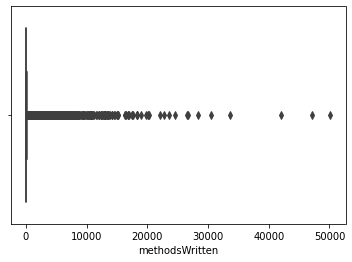

In [37]:
sns.boxplot(x=df_devexp['methodsWritten'])

<AxesSubplot:xlabel='projectContributions'>

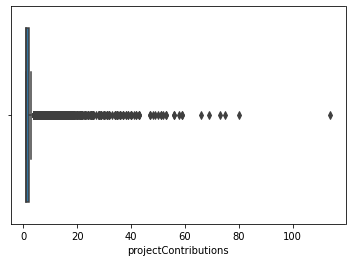

In [38]:
sns.boxplot(x=df_devexp['projectContributions'])

In [39]:
df_devexp.drop(df_devexp[df_devexp.methodsWritten > 200].index, inplace=True)
df_devexp.drop(df_devexp[df_devexp.methodsWritten < 5].index, inplace=True)

<AxesSubplot:xlabel='methodsWritten'>

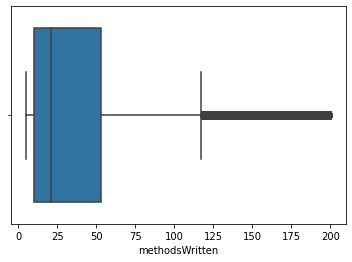

In [40]:
sns.boxplot(x=df_devexp['methodsWritten'])

<AxesSubplot:xlabel='projectContributions'>

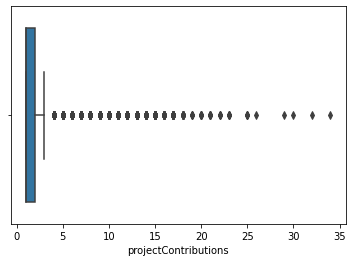

In [41]:
sns.boxplot(x=df_devexp['projectContributions'])

In [42]:
df_devexp.drop(df_devexp[df_devexp.projectContributions < 2].index, inplace=True)
df_devexp.drop(df_devexp[df_devexp.projectContributions > 10].index, inplace=True)

<AxesSubplot:xlabel='projectContributions'>

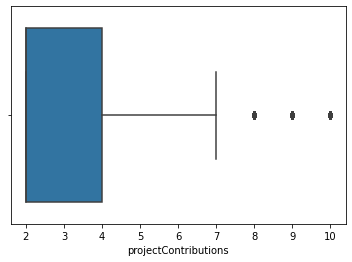

In [43]:
sns.boxplot(x=df_devexp['projectContributions'])

In [44]:
df_devexp.shape

(9182, 5)

In [45]:
print(df_devexp['projectContributions'].mean(), df_devexp['projectContributions'].std())

print(df_devexp['methodsWritten'].mean(), df_devexp['methodsWritten'].std())

3.1218688738836855 1.7109063686667438
48.325201481158786 47.68554980047044


<AxesSubplot:xlabel='projectContributions', ylabel='methodsWritten'>

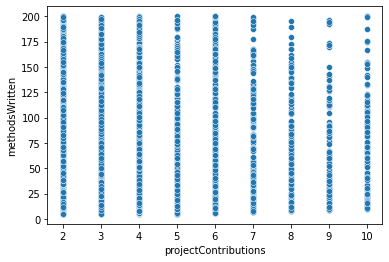

In [46]:
sns.scatterplot(data=df_devexp, x="projectContributions", y="methodsWritten")

# sns.boxplot(x=df_devexp['methodsWritten'])

<AxesSubplot:xlabel='methodsWritten'>

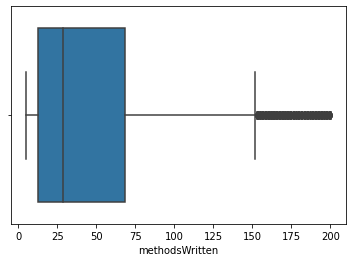

In [47]:
sns.boxplot(x=df_devexp['methodsWritten'])

<AxesSubplot:xlabel='projectContributions'>

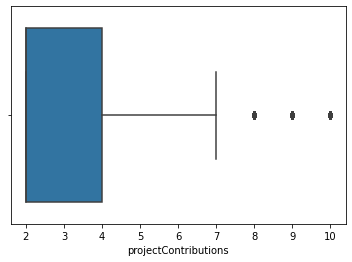

In [48]:
sns.boxplot(x=df_devexp['projectContributions'])

In [49]:
# Eventueel nog op basis van mean (bijv. 0 - mean / 2; mean / 2 - mean + mean / 2, Inf)

df_devexp['methodsWrittenCat'] = pd.cut(df_devexp['methodsWritten'], bins=[0, 5, 30, 50, 350, float('Inf')], labels=[1, 2, 3, 4, 5])
df_devexp['projectContributionsCat'] = pd.cut(df_devexp['projectContributions'], bins=[0, 3, 5, 7, 10, float('Inf')], labels=[1, 2, 3, 4, 5])
# df_devexp['linesOfCodeWrittenCat'] = pd.cut(df_devexp['linesOfCodeWritten'], bins=[0, df_devexp['linesOfCodeWritten'].mean() - df_devexp['linesOfCodeWritten'].std(), df_devexp['linesOfCodeWritten'].mean() + df_devexp['linesOfCodeWritten'].std(), float('Inf')], labels=[1, 2, 3])

df_devexp['methodsWrittenCat'] = df_devexp['methodsWrittenCat'].astype('int')
df_devexp['projectContributionsCat'] = df_devexp['projectContributionsCat'].astype('int')
# df_devexp['linesOfCodeWrittenCat'] = df_devexp['linesOfCodeWrittenCat'].astype('int')

# df_devexp

In [50]:
df_devexp['developerExperienceNum'] = (df_devexp['methodsWrittenCat'] + df_devexp['projectContributionsCat']) / 2

df_devexp['developerExperienceNum'].value_counts()

df_devexp['developerExperience'] = df_devexp['developerExperienceNum'].replace({1.0: 'Low', 1.5: 'Low', 2.0: 'Medium', 2.5: 'Medium', 3.0: 'High', 3.5: 'High', 4.0: 'High', 4.5: 'High', 5.0: 'High', 5.5: 'High', 6.0: 'High'})

df_devexp['developerExperience'] = df_devexp['developerExperience'].astype("category")

df_devexp['developerExperience'].value_counts()



# df_devexp['developerExperience'] = pd.cut(df_devexp['developerExperienceNum'], bins=[0, 0.334, 0.666, float('Inf')], labels=['Low', 'Medium', 'High'])
# df_devexp['developerExperience'] = pd.cut(df_devexp['developerExperienceNum'], bins=[0, df_devexp['developerExperienceNum'].mean() - (df_devexp['developerExperienceNum'].mean() / 2), df_devexp['developerExperienceNum'].mean() + (df_devexp['developerExperienceNum'].mean() / 2), float('Inf')], labels=['Low', 'Medium', 'High'])

# df_devexp['developerExperience'].value_counts()

1.5    3652
2.5    2472
2.0    1502
3.0     802
3.5     312
1.0     264
4.0     178
Name: developerExperienceNum, dtype: int64

Medium    3974
Low       3916
High      1292
Name: developerExperience, dtype: int64

In [51]:
df_devexp

,authorID,projectContributions,methodsWritten,noOfClones,relativeClones,methodsWrittenCat,projectContributionsCat,developerExperienceNum,developerExperience
7,001783cd-e148-690c-df95-af9074e62a30,2,29,7,0.241379,2,1,1.5,Low
14,001d52d2-96ea-3225-9009-18420302ba20,2,18,9,0.500000,2,1,1.5,Low
21,0025b42f-997b-f4dc-4b44-768a3e08279b,2,24,12,0.500000,2,1,1.5,Low
25,002e3995-e4a0-6de4-83a0-8ee00da482f9,2,126,109,0.865079,4,1,2.5,Medium
31,003342c0-37a0-e9c0-75c0-30c431abe795,2,42,0,0.000000,3,1,2.0,Medium
...,...,...,...,...,...,...,...,...,...
46536,ffe417c1-9db9-ee28-50a7-e4d739a118a3,2,12,0,0.000000,2,1,1.5,Low
46538,ffe469bc-9091-d59a-fee8-66d3c86da788,3,96,62,0.645833,4,1,2.5,Medium
46544,ffea798c-1427-3eeb-eb36-4ce22dee0866,3,60,1,0.016667,4,1,2.5,Medium
46550,fff548c0-bab8-0e22-a80a-d76717743fec,4,191,0,0.000000,4,2,3.0,High


(array([3476.,  946.,  966.,  788.,  814., 1085.,  458.,  250.,  215.,
         184.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

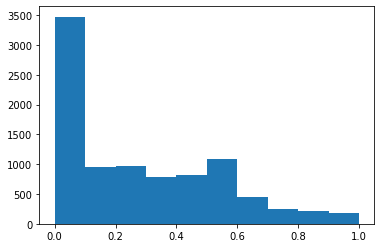

In [52]:
pyplot.hist(df_devexp['relativeClones'])

In [53]:
rp.summary_cont(df_devexp['relativeClones'])

rp.summary_cont(df_devexp['relativeClones'].groupby(df_devexp['developerExperience']))

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,relativeClones,9182.0,0.2713,0.2614,0.0027,0.2659,0.2766


,N,Mean,SD,SE,95% Conf.,Interval
developerExperience,,,,,,
High,1292,0.3671,0.2662,0.0074,0.3526,0.3816
Low,3916,0.2242,0.2340,0.0037,0.2169,0.2316
Medium,3974,0.2864,0.2748,0.0044,0.2779,0.2950


In [54]:
group_low = pd.DataFrame.dropna(df_devexp.where(df_devexp['developerExperience'] == 'Low'))['relativeClones']
group_med = pd.DataFrame.dropna(df_devexp.where(df_devexp['developerExperience'] == 'Medium'))['relativeClones']
group_high = pd.DataFrame.dropna(df_devexp.where(df_devexp['developerExperience'] == 'High'))['relativeClones']

stats.kruskal(group_low, group_med, group_high)

# df_devexp.dtypes

KruskalResult(statistic=394.3172216614013, pvalue=2.371937583187316e-86)

In [55]:
# stats.f_oneway(df_devexp['relativeClones'][df_devexp['developerExperience'] == 'Low'],
#                df_devexp['relativeClones'][df_devexp['developerExperience'] == 'Medium'],
#                df_devexp['relativeClones'][df_devexp['developerExperience'] == 'High'])

In [56]:
# stats.levene(df_devexp['relativeClones'][df_devexp['developerExperience'] == 'Low'],
#                df_devexp['relativeClones'][df_devexp['developerExperience'] == 'Medium'],
#                df_devexp['relativeClones'][df_devexp['developerExperience'] == 'High'])

In [57]:
# model = ols('developerExperienceNum ~ relativeClones', data=df_devexp).fit()
# aov_table = sm.stats.anova_lm(model, typ=2)
# aov_table

In [58]:
# df_devexp.to_csv('developerExperienceV2.csv')

In [59]:
projectInfo = pd.read_csv('projectInfo.csv')

x = projectInfo['projectName'].isna()

y = np.unique(projectInfo['projectName'])

values, counts = np.unique(projectInfo['projectName'], return_counts=True)

# f=open('f1.txt','w')
# s1='\n'.join(y)
# f.write(s1)
# f.close()

In [60]:
projectInfo.head(1)

df_am.head(1)

,Unnamed: 0,projectID,version,versionHash,license,projectName,URL,ownerID,parserVersion
0,0,571223483,3599000,f7a64d744261d60c34a4bec1661c3f4d319161c1,-,-,-,4b56e262-856e-e2db-3813-da4603320d67,1


,authorID,methodHash,projectID,projectVersion
0,e157cee2-b5b5-2466-14a8-717e9de1ce4c,b8a899ee5f7c93361e215edf5be05462,3477431694,1273494526000


In [61]:
projectSubset = projectInfo.loc[projectInfo['projectID'].isin(df_am['projectID'])]

projectSubset = pd.merge(projectInfo, df_am[['authorID', 'projectID']], on='projectID', how='outer')

projectSubset.shape
projectSubset.head()

(8828913, 10)

,Unnamed: 0,projectID,version,versionHash,license,projectName,URL,ownerID,parserVersion,authorID
0,0,571223483,3599000,f7a64d744261d60c34a4bec1661c3f4d319161c1,-,-,-,4b56e262-856e-e2db-3813-da4603320d67,1,cb123634-3ab0-2b72-4a2c-5cbb040dad1b
1,0,571223483,3599000,f7a64d744261d60c34a4bec1661c3f4d319161c1,-,-,-,4b56e262-856e-e2db-3813-da4603320d67,1,2e870656-606a-2790-da3c-bafa7417c1bc
2,0,571223483,3599000,f7a64d744261d60c34a4bec1661c3f4d319161c1,-,-,-,4b56e262-856e-e2db-3813-da4603320d67,1,2e870656-606a-2790-da3c-bafa7417c1bc
3,0,571223483,3599000,f7a64d744261d60c34a4bec1661c3f4d319161c1,-,-,-,4b56e262-856e-e2db-3813-da4603320d67,1,778b73a2-8c93-c915-7ac8-cf5d8c031359
4,0,571223483,3599000,f7a64d744261d60c34a4bec1661c3f4d319161c1,-,-,-,4b56e262-856e-e2db-3813-da4603320d67,1,778b73a2-8c93-c915-7ac8-cf5d8c031359


In [62]:
# replace = pd.read_csv('pop_search/replace.csv')

# newResults = []

# for i in replace['searchResults']:
#     newResults.append(i.split()[1])
    
# replace['searchResults'] = newResults

# replace = replace.drop(columns='Unnamed: 0')

# replace 
# replace.to_csv('replace_new.csv')

# #     replace['searchResults']test[0].split()[1]

In [63]:
df_pop = ""

In [64]:
df_pop = pd.read_csv('pop_search/project_popularity.csv', thousands=',')

df_pop['searchResults'] = df_pop['searchResults'].replace(',','', regex=True)
df_pop['searchResults'] = df_pop['searchResults'].astype("int64")


df_pop.dtypes

Unnamed: 0        int64
projectName      object
searchResults     int64
dtype: object

In [65]:
df_pop['searchResults'].mean()
df_pop['searchResults'].std()

26329275.660099607

149340786.18219778

In [66]:
df_pop['searchResultsCat'] = pd.cut(df_pop['searchResults'], bins=[0, df_pop['searchResults'].mean() - (df_pop['searchResults'].mean() / 2), df_pop['searchResults'].mean() + (df_pop['searchResults'].mean() / 2), float('Inf')], labels=[1, 2, 3])
# df_pop['searchResultsCat'] = df_pop['searchResultsCat'].astype('int')

# df_devexp['developerExperience'] = pd.cut(df_devexp['developerExperienceNum'], bins=[0, 0.333, 0.667, float('Inf')], labels=['Low', 'Medium', 'High'])

df_pop

,Unnamed: 0,projectName,searchResults,searchResultsCat
0,0,Django-EditArea,1170000,1
1,0,Django-Creators,145000000,3
2,0,Django-ABTest,39800,1
3,0,Diverse,20600000,2
4,0,Divan,3220000,1
...,...,...,...,...
22684,0,dlurl,5880,1
22685,0,dltest,5470000,1
22686,0,dlcover,46600000,3
22687,0,dklab_realplexor,512,1


In [67]:
df_pop['searchResultsCat'].value_counts()

1    16935
2     3541
3     2213
Name: searchResultsCat, dtype: int64

# Determining ODF's

In [68]:
lw = pd.read_csv('../cleanedAuthorMethodV3.csv')

In [69]:
lw = lw.iloc[:, 2:]
numberOfProjects = lw.groupby(by='authorID', as_index=False).agg({'projectID': pd.Series.nunique})
numberOfProjects = numberOfProjects.rename(columns={"projectID": "number of unique projects"})

# Extracting OneDayFlies
odf = numberOfProjects[numberOfProjects['number of unique projects'] == 1]
# odf.to_csv('odf.csv', index=False)

In [70]:
odf

,authorID,number of unique projects
0,0000af9f-a905-451b-97eb-11659ec418ae,1
2,000d68e3-5cfd-ac90-4cfb-6ca73a5f0a2b,1
4,000e1a5c-2718-849c-34be-f3f4b549431e,1
5,0010741a-3ebb-4604-7624-de51962dd9e4,1
6,00112002-1997-9040-de0e-e8f3619a9ea8,1
...,...,...
46553,fffab261-81b4-06d3-00bf-84a7ed82cd5e,1
46554,fffb1150-c8af-1afe-6ba8-3378481399e5,1
46555,fffca9f3-2fc1-f261-07d2-3a868785a40e,1
46558,fffefb92-0dfd-9853-c5fe-7ea975f902d3,1


In [71]:
# projects_full = projectSubset.loc[projectSubset['projectName'].isin(df_pop['projectName'])]

# projects_full = df_pop.loc[projectSubset['projectName'].isin(projectSubset['projectName'])]

projects_full = pd.merge(projectSubset, df_pop[['projectName', 'searchResults', 'searchResultsCat']], on='projectName', how='outer')

projects_full.head(5)

projects_full.dtypes


,Unnamed: 0,projectID,version,versionHash,license,projectName,URL,ownerID,parserVersion,authorID,searchResults,searchResultsCat
0,0,571223483,3599000,f7a64d744261d60c34a4bec1661c3f4d319161c1,-,-,-,4b56e262-856e-e2db-3813-da4603320d67,1,cb123634-3ab0-2b72-4a2c-5cbb040dad1b,68800000.0,3
1,0,571223483,3599000,f7a64d744261d60c34a4bec1661c3f4d319161c1,-,-,-,4b56e262-856e-e2db-3813-da4603320d67,1,cb123634-3ab0-2b72-4a2c-5cbb040dad1b,68800000.0,3
2,0,571223483,3599000,f7a64d744261d60c34a4bec1661c3f4d319161c1,-,-,-,4b56e262-856e-e2db-3813-da4603320d67,1,2e870656-606a-2790-da3c-bafa7417c1bc,68800000.0,3
3,0,571223483,3599000,f7a64d744261d60c34a4bec1661c3f4d319161c1,-,-,-,4b56e262-856e-e2db-3813-da4603320d67,1,2e870656-606a-2790-da3c-bafa7417c1bc,68800000.0,3
4,0,571223483,3599000,f7a64d744261d60c34a4bec1661c3f4d319161c1,-,-,-,4b56e262-856e-e2db-3813-da4603320d67,1,2e870656-606a-2790-da3c-bafa7417c1bc,68800000.0,3


Unnamed: 0             int64
projectID              int64
version                int64
versionHash           object
license               object
projectName           object
URL                   object
ownerID               object
parserVersion          int64
authorID              object
searchResults        float64
searchResultsCat    category
dtype: object

In [72]:
avg_search_results = pd.DataFrame(projects_full.groupby(['authorID'])['searchResults'].mean()).reset_index()

avg_search_results.head(3)

,authorID,searchResults
0,0000af9f-a905-451b-97eb-11659ec418ae,117000.0
1,0009b48d-edbe-7935-6c54-24943485e7d3,14300000.0
2,000d68e3-5cfd-ac90-4cfb-6ca73a5f0a2b,800000.0


In [73]:
one_day_flies = projects_full.where(projects_full['searchResultsCat'] == 3)

In [74]:
len(one_day_flies['authorID'].unique())

5601

# Networkers

In [75]:
df_nw = pd.read_csv('../cleanedAuthorMethodV3.csv')

In [76]:
df_nw = df_nw.iloc[:, 2:]

numberOfProjects_nw = df_nw.groupby(by='authorID', as_index=False).agg({'projectID': pd.Series.nunique})
numberOfProjects_nw = numberOfProjects_nw.rename(columns={"projectID": "number of unique projects"})
mean = numberOfProjects_nw['number of unique projects'].mean()
std = numberOfProjects_nw['number of unique projects'].std()

# count all developers with 1 std from mean
df2 = numberOfProjects_nw[numberOfProjects_nw['number of unique projects'] > mean + std]

df2

,authorID,number of unique projects
19,0023ebc7-5ee6-31b2-f4a0-a05b2794885e,15
29,0030b60b-6ec2-7038-056e-c6fc593ded67,10
32,00347348-4f54-ea03-f1ea-c127a33cd48d,18
36,003e7487-6649-3a77-e99e-2ab231001335,20
38,0042a305-a724-831b-fdbd-669df6eef763,9
...,...,...
46468,ff92b759-9df3-9aef-ef42-b279a5f4c4be,25
46497,ffaec9de-ff49-d7e6-d0ea-deb8e2f1e277,7
46500,ffb323a7-a275-ac07-3bd0-521fb7e7a3b7,5
46520,ffcaf84e-ed93-3eda-15ee-7b574c6bb88d,5


In [77]:
len(df2['authorID'])

3226

# Lone Wolves

In [78]:
# lone_wolves = []

# with open('lone_wolves.txt', 'r') as f:
#     for line in f:
#         line = line.strip()
#         lone_wolves.append(line)
        
# lone_wolves

In [79]:
# wolfs_lone = numberOfProjects_nw[numberOfProjects_nw['number of unique projects'] <= 3]

In [80]:
# wolfs_lone

# Construct DataFrame with Developers

In [81]:
# MERGE ALL INTO DATAFRAME

df_devs = pd.read_csv('authorNumbersV3.csv')
df_devs = df_devs.rename(columns={"author":"authorID"})
df_devs = df_devs.rename(columns={"noOfProj":"projectContributions"})
df_devs = df_devs.rename(columns={"noOfMethods":"methodsWritten"})

# Operation:
# Find developer type with df.loc from df with these developers.
# Assign deverloper type name in separate column.
# Do this for all developer types
# Merge df's.

# Lone wolves
df_merge1 = df_devs.loc[df_devs['authorID'].isin(lone_wolves)]
df_merge1['developerType'] = 'Lonewolf'

# Networkers
df_merge2 = df_devs.loc[df_devs['authorID'].isin(df2['authorID'])]
df_merge2['developerType'] = 'Networker'

# One-day-flies
df_merge3 = df_devs.loc[df_devs['authorID'].isin(one_day_flies['authorID'])]
df_merge3['developerType'] = 'OneDayFly'

frames = [df_merge1, df_merge2, df_merge3]

df_developers = pd.concat(frames)
df_developers = df_developers.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])


# df_developers_labeled = df_merge4.loc[df_merge4['authorID'].isin(df_developers['authorID'])]

# df_developers_labeled.head(3)
# 10,190

df_developers.drop(df_developers[df_developers.projectContributions > 100].index, inplace=True)
df_developers.drop(df_developers[df_developers.methodsWritten > 10000].index, inplace=True)

df_developers.head(3)
df_developers['developerType'].value_counts()


# df_developers.loc[df_developers['authorID'].isin(df_developers_labeled['authorID'])]['developerType']
# df_developers

# df_developers_labeled['developerType'].value_counts()
# df_developers_labeled['developerExperience'].value_counts()

# df_developers_labeled.head()

,authorID,projectContributions,methodsWritten,noOfClones,relativeClones,developerType
3,000dff81-1f83-c6b8-7b91-c9427d763ce2,2,866,705,0.814088,Lonewolf
13,001b3152-ac8a-d673-f1a3-390018a926a9,1,243,242,0.995885,Lonewolf
25,002e3995-e4a0-6de4-83a0-8ee00da482f9,2,126,109,0.865079,Lonewolf


Lonewolf     5934
OneDayFly    5582
Networker    3190
Name: developerType, dtype: int64

In [82]:
# df_developers.loc(df_developers['authorID'].isin(projects_full['authorID']))

<AxesSubplot:xlabel='projectContributions', ylabel='methodsWritten'>

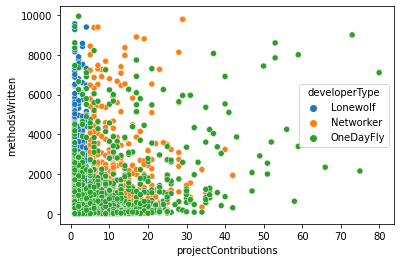

In [83]:
sns.scatterplot(data=df_developers, x="projectContributions", y="methodsWritten", hue='developerType')

In [84]:
# df_merge4.dropna()

In [85]:
df_relevant_developers = df_devexp

In [86]:
rp.summary_cont(df_relevant_developers['relativeClones'])

# rp.summary_cont(df_relevant_developers['relativeClones'].groupby(df_relevant_developers['developerType']))

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,relativeClones,9182.0,0.2713,0.2614,0.0027,0.2659,0.2766


In [87]:
group_nw = pd.DataFrame.dropna(df_developers.where(df_developers['developerType'] == 'Networker'))['relativeClones']
group_lw = pd.DataFrame.dropna(df_developers.where(df_developers['developerType'] == 'Lonewolf'))['relativeClones']
group_odf = pd.DataFrame.dropna(df_developers.where(df_developers['developerType'] == 'OneDayFly'))['relativeClones']

stats.kruskal(group_nw, group_lw, group_odf)

KruskalResult(statistic=1794.4094827659696, pvalue=0.0)

In [88]:
rp.summary_cont(df_developers['relativeClones'].groupby(df_developers['developerType']))

stats.f_oneway(df_developers['relativeClones'][df_developers['developerType'] == 'Lonewolf'],
               df_developers['relativeClones'][df_developers['developerType'] == 'Networker'],
               df_developers['relativeClones'][df_developers['developerType'] == 'OneDayFly'])
# p: 0.0000000000000000000000000000000000000000010812331287603708

# Checkt voor variance van data binnen de developer type groepen. p < 0.05 betekent dat de variance significant is.
stats.levene(df_developers['relativeClones'][df_developers['developerType'] == 'Lonewolf'],
               df_developers['relativeClones'][df_developers['developerType'] == 'Networker'],
               df_developers['relativeClones'][df_developers['developerType'] == 'OneDayFly'])
# p: 0.0000000000000000000000000000000000000604827149383733

,N,Mean,SD,SE,95% Conf.,Interval
developerType,,,,,,
Lonewolf,5934,0.4679,0.4080,0.0053,0.4575,0.4783
Networker,3190,0.4520,0.2724,0.0048,0.4426,0.4615
OneDayFly,5582,0.2461,0.3420,0.0046,0.2371,0.2551


F_onewayResult(statistic=636.2617967685229, pvalue=9.654281557486444e-266)

LeveneResult(statistic=610.3280809975513, pvalue=2.3297756651565756e-255)

# Running K-Means to discover Developer Types

In [90]:
# df_devexp = df_devexp.drop(columns = ['searchResults_x', 'searchResults_y'])

In [91]:
df_relevant_developers = pd.merge(df_devexp, avg_search_results, on=['authorID'], how='right')

In [92]:
df_relevant_developers

,authorID,projectContributions,methodsWritten,noOfClones,relativeClones,methodsWrittenCat,projectContributionsCat,developerExperienceNum,developerExperience,searchResults
0,0000af9f-a905-451b-97eb-11659ec418ae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.170000e+05
1,0009b48d-edbe-7935-6c54-24943485e7d3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.430000e+07
2,000d68e3-5cfd-ac90-4cfb-6ca73a5f0a2b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000e+05
3,000dff81-1f83-c6b8-7b91-c9427d763ce2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.010000e+06
4,000e1a5c-2718-849c-34be-f3f4b549431e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.670000e+05
...,...,...,...,...,...,...,...,...,...,...
46555,fffca9f3-2fc1-f261-07d2-3a868785a40e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.320000e+06
46556,fffce205-0f26-9ddf-0b98-1aeb3022c19e,2.0,124.0,27.0,0.217742,4.0,1.0,2.5,Medium,1.850000e+07
46557,fffe4bb8-09db-9b70-4379-1ffa9496d82b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.609671e+06
46558,fffefb92-0dfd-9853-c5fe-7ea975f902d3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.300000e+07


In [93]:
df_relevant_developers['developerExperienceNum'] = df_relevant_developers['developerExperienceNum'].astype("category")

df_relevant_developers = df_relevant_developers.dropna()

df_relevant_developers['searchResults'] = df_relevant_developers['searchResults'].astype("int64")

df_relevant_developers

df_relevant_developers.dtypes

,authorID,projectContributions,methodsWritten,noOfClones,relativeClones,methodsWrittenCat,projectContributionsCat,developerExperienceNum,developerExperience,searchResults
7,001783cd-e148-690c-df95-af9074e62a30,2.0,29.0,7.0,0.241379,2.0,1.0,1.5,Low,867000
14,001d52d2-96ea-3225-9009-18420302ba20,2.0,18.0,9.0,0.500000,2.0,1.0,1.5,Low,21100000
21,0025b42f-997b-f4dc-4b44-768a3e08279b,2.0,24.0,12.0,0.500000,2.0,1.0,1.5,Low,23200000
25,002e3995-e4a0-6de4-83a0-8ee00da482f9,2.0,126.0,109.0,0.865079,4.0,1.0,2.5,Medium,4730000
31,003342c0-37a0-e9c0-75c0-30c431abe795,2.0,42.0,0.0,0.000000,3.0,1.0,2.0,Medium,601885
...,...,...,...,...,...,...,...,...,...,...
46536,ffe417c1-9db9-ee28-50a7-e4d739a118a3,2.0,12.0,0.0,0.000000,2.0,1.0,1.5,Low,7240000
46538,ffe469bc-9091-d59a-fee8-66d3c86da788,3.0,96.0,62.0,0.645833,4.0,1.0,2.5,Medium,169000
46544,ffea798c-1427-3eeb-eb36-4ce22dee0866,3.0,60.0,1.0,0.016667,4.0,1.0,2.5,Medium,3435033
46550,fff548c0-bab8-0e22-a80a-d76717743fec,4.0,191.0,0.0,0.000000,4.0,2.0,3.0,High,89689136


authorID                     object
projectContributions        float64
methodsWritten              float64
noOfClones                  float64
relativeClones              float64
methodsWrittenCat           float64
projectContributionsCat     float64
developerExperienceNum     category
developerExperience        category
searchResults                 int64
dtype: object

In [94]:
# df_devexp.drop(df_devexp[df_devexp.projectContributions > 100].index, inplace=True)
# df_devexp.drop(df_devexp[df_devexp.methodsWritten > 10000].index, inplace=True)

# df_devexp.drop(df_devexp[df_devexp.projectContributions < 4].index, inplace=True)
# df_devexp.drop(df_devexp[df_devexp.methodsWritten < 25].index, inplace=True)

In [95]:
df_km = df_relevant_developers.drop(columns = ['noOfClones', 'projectContributionsCat', 'methodsWrittenCat', 'developerExperience', 'developerExperienceNum', 'searchResults', 'relativeClones'])

df_km

,authorID,projectContributions,methodsWritten
7,001783cd-e148-690c-df95-af9074e62a30,2.0,29.0
14,001d52d2-96ea-3225-9009-18420302ba20,2.0,18.0
21,0025b42f-997b-f4dc-4b44-768a3e08279b,2.0,24.0
25,002e3995-e4a0-6de4-83a0-8ee00da482f9,2.0,126.0
31,003342c0-37a0-e9c0-75c0-30c431abe795,2.0,42.0
...,...,...,...
46536,ffe417c1-9db9-ee28-50a7-e4d739a118a3,2.0,12.0
46538,ffe469bc-9091-d59a-fee8-66d3c86da788,3.0,96.0
46544,ffea798c-1427-3eeb-eb36-4ce22dee0866,3.0,60.0
46550,fff548c0-bab8-0e22-a80a-d76717743fec,4.0,191.0


<AxesSubplot:xlabel='projectContributions', ylabel='methodsWritten'>

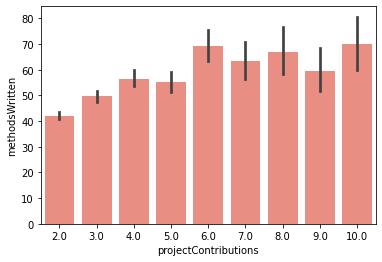

In [96]:
# sns.scatterplot(data=df_km, x="projectContributions", y="methodsWritten")

sns.barplot(data=df_km, x="projectContributions", y="methodsWritten", color='salmon')

In [97]:
# from scipy import stats
# df_km[(np.abs(stats.zscore(df_km)) < 3).all(axis=1)]

In [98]:
df_km['projectContributions'].median()
df_km['methodsWritten'].median()

2.0

29.0

In [99]:
# from sklearn.cluster import KMeans

# distortions = []
# K = range(1,10)
# for k in K:
#     kmeanModel = KMeans(n_clusters=k)
#     kmeanModel.fit(df_km[['projectContributions', 'methodsWritten']])
#     distortions.append(kmeanModel.inertia_)

In [100]:
# plt.figure(figsize=(16,8))
# plt.plot(K, distortions, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Distortion')
# plt.title('The Elbow Method showing the optimal k')
# plt.show()

In [101]:
df_km[['projectContributions', 'methodsWritten']]

,projectContributions,methodsWritten
7,2.0,29.0
14,2.0,18.0
21,2.0,24.0
25,2.0,126.0
31,2.0,42.0
...,...,...
46536,2.0,12.0
46538,3.0,96.0
46544,3.0,60.0
46550,4.0,191.0


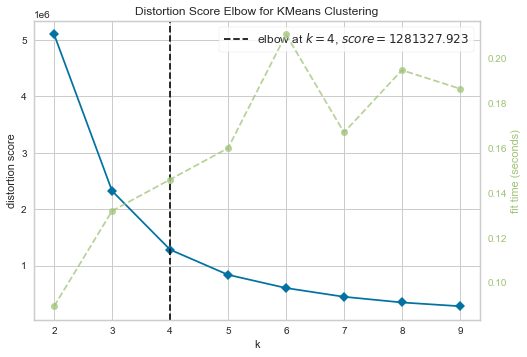

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

In [102]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

kelbow_visualizer(KMeans(random_state=3), df_km[['projectContributions', 'methodsWritten']], k=(2,10))

In [103]:
kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(df_km[['projectContributions', 'methodsWritten']])

KMeans(n_clusters=4)

In [104]:
df_km['k_means'] = kmeanModel.predict(df_km[['projectContributions', 'methodsWritten']])

df_km['k_means'] = df_km['k_means'].astype("category")

In [105]:
df_km['k_means'].value_counts()

0    5057
2    2150
1    1182
3     746
Name: k_means, dtype: int64

In [106]:
df_km['projectContributions'].mean()
df_km['methodsWritten'].mean()

3.125232621784346

48.31373836891078

In [107]:
df_km

,authorID,projectContributions,methodsWritten,k_means
7,001783cd-e148-690c-df95-af9074e62a30,2.0,29.0,0
14,001d52d2-96ea-3225-9009-18420302ba20,2.0,18.0,0
21,0025b42f-997b-f4dc-4b44-768a3e08279b,2.0,24.0,0
25,002e3995-e4a0-6de4-83a0-8ee00da482f9,2.0,126.0,1
31,003342c0-37a0-e9c0-75c0-30c431abe795,2.0,42.0,2
...,...,...,...,...
46536,ffe417c1-9db9-ee28-50a7-e4d739a118a3,2.0,12.0,0
46538,ffe469bc-9091-d59a-fee8-66d3c86da788,3.0,96.0,1
46544,ffea798c-1427-3eeb-eb36-4ce22dee0866,3.0,60.0,2
46550,fff548c0-bab8-0e22-a80a-d76717743fec,4.0,191.0,3


<AxesSubplot:xlabel='projectContributions', ylabel='methodsWritten'>

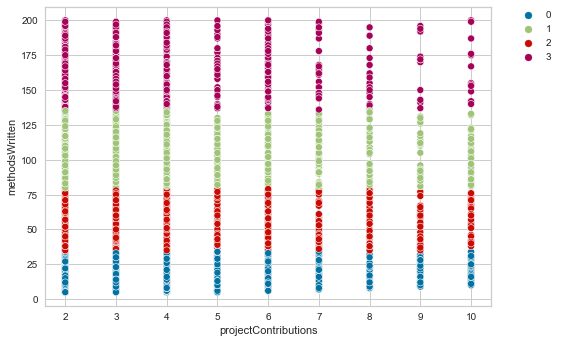

In [108]:
sns.scatterplot(data=df_km, x="projectContributions", y="methodsWritten", hue="k_means")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [109]:
df_krusk = pd.merge(df_km, df_relevant_developers[['authorID', 'noOfClones', 'relativeClones', 'searchResults']], on=['authorID'], how='right')

In [110]:
df_krusk.head(1)

,authorID,projectContributions,methodsWritten,k_means,noOfClones,relativeClones,searchResults
0,001783cd-e148-690c-df95-af9074e62a30,2.0,29.0,0,7.0,0.241379,867000


(array([3467.,  943.,  963.,  777.,  803., 1079.,  457.,  248.,  214.,
         184.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

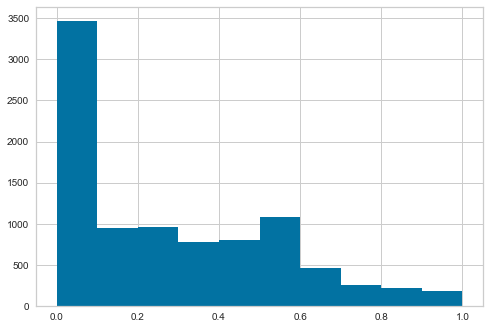

In [111]:
pyplot.hist(df_krusk['relativeClones'])

<AxesSubplot:xlabel='searchResults'>

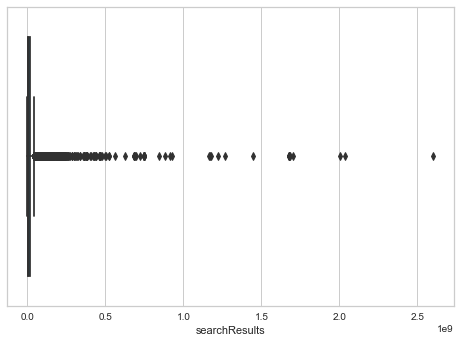

In [112]:
sns.boxplot(x=df_krusk['searchResults'])

In [113]:
df_krusk['searchResults_ol'] = df_krusk['searchResults'].where(df_krusk['searchResults'] < 500000000, df_krusk['searchResults'].median())
df_krusk['searchResults_ol'] = df_krusk['searchResults_ol'].astype(int)


df_krusk.head(1)
df_krusk.dtypes


,authorID,projectContributions,methodsWritten,k_means,noOfClones,relativeClones,searchResults,searchResults_ol
0,001783cd-e148-690c-df95-af9074e62a30,2.0,29.0,0,7.0,0.241379,867000,867000


authorID                  object
projectContributions     float64
methodsWritten           float64
k_means                 category
noOfClones               float64
relativeClones           float64
searchResults              int64
searchResults_ol           int32
dtype: object

In [114]:
df_krusk['methodsWrittenCat'] = pd.cut(df_krusk['methodsWritten'], bins=[0, 15, 25, 55, 75, float('Inf')], labels=[1, 2, 3, 4, 5])
df_krusk['projectContributionsCat'] = pd.cut(df_krusk['projectContributions'], bins=[0, 2, 3, 5, 7, float('Inf')], labels=[1, 2, 3, 4, 5])

df_krusk['methodsWrittenCat'] = df_krusk['methodsWrittenCat'].astype('int')
df_krusk['projectContributionsCat'] = df_krusk['projectContributionsCat'].astype('int')

df_krusk.head(1)

,authorID,projectContributions,methodsWritten,k_means,noOfClones,relativeClones,searchResults,searchResults_ol,methodsWrittenCat,projectContributionsCat
0,001783cd-e148-690c-df95-af9074e62a30,2.0,29.0,0,7.0,0.241379,867000,867000,3,1


In [115]:
df_krusk['developerExperienceNum'] = (df_krusk['methodsWrittenCat'] + df_krusk['projectContributionsCat']) / 2

df_krusk['developerExperienceNum'].value_counts()

df_krusk['developerExperience'] = df_krusk['developerExperienceNum'].replace({1.0: 'Low', 1.5: 'Low', 2.0: 'Medium', 2.5: 'Medium', 3.0: 'High', 3.5: 'High', 4.0: 'High', 4.5: 'High', 5.0: 'High', 5.5: 'High', 6.0: 'High'})

df_krusk['developerExperience'] = df_krusk['developerExperience'].astype("category")

df_krusk['developerExperience'].value_counts()

1.0    1759
2.0    1656
3.0    1481
1.5    1355
2.5    1180
3.5     817
4.0     525
4.5     230
5.0     132
Name: developerExperienceNum, dtype: int64

High      3185
Low       3114
Medium    2836
Name: developerExperience, dtype: int64

In [116]:
# Calculate average of each k_means group

# df_am.loc[df_am['authorID']

grp1 = df_krusk.loc[df_krusk['k_means'] == 0]
grp2 = df_krusk.loc[df_krusk['k_means'] == 1]
grp3 = df_krusk.loc[df_krusk['k_means'] == 2]
grp4 = df_krusk.loc[df_krusk['k_means'] == 3]

In [117]:
grp1.mean()
grp2.mean()
grp3.mean()
grp4.mean()

C:\Users\NOUDJA~1\AppData\Local\Temp/ipykernel_9920/1389850385.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



projectContributions       2.890647e+00
methodsWritten             1.565256e+01
noOfClones                 3.934348e+00
relativeClones             2.613371e-01
searchResults              1.933969e+07
searchResults_ol           1.553139e+07
methodsWrittenCat          1.607277e+00
projectContributionsCat    1.707732e+00
developerExperienceNum     1.657504e+00
dtype: float64

C:\Users\NOUDJA~1\AppData\Local\Temp/ipykernel_9920/1389850385.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



projectContributions       3.603215e+00
methodsWritten             1.048849e+02
noOfClones                 3.117851e+01
relativeClones             2.978293e-01
searchResults              1.908045e+07
searchResults_ol           1.302255e+07
methodsWrittenCat          5.000000e+00
projectContributionsCat    2.198816e+00
developerExperienceNum     3.599408e+00
dtype: float64

C:\Users\NOUDJA~1\AppData\Local\Temp/ipykernel_9920/1389850385.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



projectContributions       3.285116e+00
methodsWritten             5.330698e+01
noOfClones                 1.386744e+01
relativeClones             2.580773e-01
searchResults              2.336271e+07
searchResults_ol           1.576446e+07
methodsWrittenCat          3.464186e+00
projectContributionsCat    1.982326e+00
developerExperienceNum     2.723256e+00
dtype: float64

C:\Users\NOUDJA~1\AppData\Local\Temp/ipykernel_9920/1389850385.py:4: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



projectContributions       3.497319e+00
methodsWritten             1.656930e+02
noOfClones                 5.518901e+01
relativeClones             3.294402e-01
searchResults              1.426438e+07
searchResults_ol           1.303026e+07
methodsWrittenCat          5.000000e+00
projectContributionsCat    2.130027e+00
developerExperienceNum     3.565013e+00
dtype: float64

In [118]:
grp1.median()
grp2.median()
grp3.median()
grp4.median()

C:\Users\NOUDJA~1\AppData\Local\Temp/ipykernel_9920/272790725.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



projectContributions             2.0
methodsWritten                  14.0
noOfClones                       2.0
relativeClones                   0.2
searchResults              3458800.0
searchResults_ol           3322962.0
methodsWrittenCat                1.0
projectContributionsCat          1.0
developerExperienceNum           1.5
dtype: float64

C:\Users\NOUDJA~1\AppData\Local\Temp/ipykernel_9920/272790725.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



projectContributions       3.000000e+00
methodsWritten             1.040000e+02
noOfClones                 2.600000e+01
relativeClones             2.540417e-01
searchResults              3.510078e+06
searchResults_ol           3.320000e+06
methodsWrittenCat          5.000000e+00
projectContributionsCat    2.000000e+00
developerExperienceNum     3.500000e+00
dtype: float64

C:\Users\NOUDJA~1\AppData\Local\Temp/ipykernel_9920/272790725.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



projectContributions       3.000000e+00
methodsWritten             5.200000e+01
noOfClones                 1.000000e+01
relativeClones             1.891892e-01
searchResults              3.271328e+06
searchResults_ol           3.271328e+06
methodsWrittenCat          3.000000e+00
projectContributionsCat    2.000000e+00
developerExperienceNum     2.500000e+00
dtype: float64

C:\Users\NOUDJA~1\AppData\Local\Temp/ipykernel_9920/272790725.py:4: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



projectContributions       3.000000e+00
methodsWritten             1.640000e+02
noOfClones                 4.550000e+01
relativeClones             2.735028e-01
searchResults              2.614122e+06
searchResults_ol           2.614122e+06
methodsWrittenCat          5.000000e+00
projectContributionsCat    2.000000e+00
developerExperienceNum     3.500000e+00
dtype: float64

In [119]:
rp.summary_cont(df_krusk['relativeClones'])

rp.summary_cont(df_krusk['relativeClones'].groupby(df_krusk['developerExperience']))

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,relativeClones,9135.0,0.2709,0.2616,0.0027,0.2655,0.2762


,N,Mean,SD,SE,95% Conf.,Interval
developerExperience,,,,,,
High,3185,0.3249,0.2786,0.0049,0.3152,0.3346
Low,3114,0.2189,0.2304,0.0041,0.2108,0.2269
Medium,2836,0.2673,0.2621,0.0049,0.2576,0.2769


In [120]:
group_0 = pd.DataFrame.dropna(df_krusk.where(df_krusk['k_means'] == 0))['relativeClones']
group_1 = pd.DataFrame.dropna(df_krusk.where(df_krusk['k_means'] == 1))['relativeClones']
group_2 = pd.DataFrame.dropna(df_krusk.where(df_krusk['k_means'] == 2))['relativeClones']
group_3 = pd.DataFrame.dropna(df_krusk.where(df_krusk['k_means'] == 3))['relativeClones']
# group_4 = pd.DataFrame.dropna(df_krusk.where(df_krusk['k_means'] == 4))['relativeClones']

stats.kruskal(group_0, group_1, group_2, group_3)
# stats.kruskal(group_0, group_1, group_2, group_3, group_4)

KruskalResult(statistic=70.72679562236797, pvalue=2.982763014867889e-15)

In [125]:
rp.summary_cont(df_krusk['relativeClones'])

rp.summary_cont(df_krusk['relativeClones'].groupby(df_krusk['k_means']))

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,relativeClones,9135.0,0.2709,0.2616,0.0027,0.2655,0.2762


,N,Mean,SD,SE,95% Conf.,Interval
k_means,,,,,,
0,5057,0.2613,0.2526,0.0036,0.2544,0.2683
1,1182,0.2978,0.2770,0.0081,0.2820,0.3136
2,2150,0.2581,0.2560,0.0055,0.2472,0.2689
3,746,0.3294,0.2988,0.0109,0.3080,0.3509


In [122]:
group_low = pd.DataFrame.dropna(df_krusk.where(df_krusk['developerExperience'] == 'Low'))['relativeClones']
group_med = pd.DataFrame.dropna(df_krusk.where(df_krusk['developerExperience'] == 'Medium'))['relativeClones']
group_high = pd.DataFrame.dropna(df_krusk.where(df_krusk['developerExperience'] == 'High'))['relativeClones']

stats.kruskal(group_low, group_med, group_high)

KruskalResult(statistic=330.9761722003531, pvalue=1.347216477554153e-72)

In [123]:
import scikit_posthocs as sp

all_groups = [group_low, group_med, group_high]
sp.posthoc_dunn(all_groups, p_adjust = 'bonferroni')

,1,2,3
1,1.000000e+00,2.835135e-17,1.915034e-73
2,2.835135e-17,1.000000e+00,2.107087e-19
3,1.915034e-73,2.107087e-19,1.000000e+00


In [124]:
all_groups_2 = [group_0, group_1, group_2, group_3]
sp.posthoc_dunn(all_groups_2, p_adjust = 'bonferroni').round()

,1,2,3,4
1,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0
